**Problem Statement :- In this Micro-credit defaulter project, we have 35 independent features related to a telecom industry and we want to predict the target feature named as Label (Label has Categories of 0 & 1, 0 means Defaulter and 1 means Non-Defaulter).This is the problem of Binary Classification.**

In [533]:
#Importing important python packages and modules. 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [534]:
#Mounting the file from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [535]:
#Providing the file directory path and loading the dataset file into a pandas dataframe.
path = "/content/drive/MyDrive/Ethics/new_loan_file.csv"
df = pd.read_csv(path)

In [536]:
#Checking first five rows of the dataset.
df.head()

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  \
0    220.13    260.13                2.0                0.0              1539   
1   3691.26   3691.26               20.0                0.0              5787   
2    900.13    900.13                3.0                0.0              1539   
3    159.42    159.42               41.0                0.0               947   
4   1098.90   1098.90                4.0                0.0              2309   

   cnt_ma_rech30  fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0              2          21.0             3078.0                1539.0   
1              1           0.0             5787.0                5787.0   
2              1           0.0             1539.0                1539.0   
3              0           0.0                0.0                   0.0   
4              7           2.0            20029.0                2309.0   

   medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                  7.50              2            21               3078   
1                 61.04              1             0               5787   
2                 66.32              1             0               1539   
3                  0.00              1             0                947   
4                 29.00              8             2              23496   

   medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  fr_da_rech30  \
0                1539.0                  7.50            0.0           0.0   
1                5787.0                 61.04            0.0           0.0   
2                1539.0                 66.32            0.0           0.0   
3                 947.0                  2.50            0.0           0.0   
4                2888.0                 35.00            0.0           0.0   

   cnt_da_rech90  fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0              0             0            2            12              6.0   
1              0             0            1            12             12.0   
2              0             0            1             6              6.0   
3              0             0            2            12              6.0   
4              0             0            7            42              6.0   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                 0.0          2.0            12                6   
1                 0.0          1.0            12               12   
2                 0.0          1.0             6                6   
3                 0.0          2.0            12                6   
4                 0.0          7.0            42                6   

   medianamnt_loans90  payback30  payback90 pcircle       pdate  
0                 0.0  29.000000  29.000000     UPW  2016-07-20  
1                 0.0   0.000000   0.000000     UPW  2016-08-10  
2                 0.0   0.000000   0.000000     UPW  2016-08-19  
3                 0.0   0.000000   0.000000     UPW  2016-06-06  
4                 0.0   2.333333   2.333333     UPW  2016-06-22

In [537]:
#Checking the name of the columns of the dataframe.
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [538]:
#Checking the values in column Unnamed:0.
df["Unnamed: 0"].value_counts()

2047      1
41537     1
62027     1
64074     1
57929     1
         ..
105881    1
103832    1
126359    1
124310    1
2049      1
Name: Unnamed: 0, Length: 209593, dtype: int64

In [539]:
#Dropping the column named as Unnamed:0 since it is simply the serial number.
df=df.drop(["Unnamed: 0"], axis = 1)

In [540]:
#Checking the shape of the dataframe.
df.shape

(209593, 36)

Our dataset has 209593 rows and 36 columns.

In [541]:
#Lets check the information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

**Great Our dataset doesnt contain the null values. **

In [542]:
#Checking the column names from the dataset.
df.columns

Index(['label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [543]:
#Arranging the columns in a new sequence for our convenience.
df=df[['msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate','label']]

In [544]:
#Checking the values of the target variable.
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

**Our target variable represents heavily imbalanced classification dataset.We need to make it balanced for sake of good machine learning model building.**

In [545]:
#Bifurcating the dataset into independent features and dependent features.
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

x----->Independent Variables.
y----->Target Variable.

In [546]:
#Target Variable column.
y.shape

(209593,)

In [547]:
#Independent Variables.
x.shape

(209593, 35)

In [548]:
#Importing the Counter module from collections package.
from collections import Counter

In [549]:
#Importing the modules from the imblearn packages.
from imblearn import under_sampling, over_sampling
from imblearn.under_sampling import RandomUnderSampler

rus=RandomUnderSampler(random_state=0)
x_resampled,y_resampled=rus.fit_resample(x,y)
print(sorted(Counter(y_resampled).items()),y_resampled.shape)

[(0, 26162), (1, 26162)] (52324,)


In [550]:
#Shape of the indepedent variables after undersampling.
x_resampled.shape

(52324, 35)

In [551]:
#Shape of the dependent variable after the undersampling.
y_resampled.shape

(52324,)

In [552]:
x_resampled

array([['21408I70789', 272.0, 3055.05, ..., 29.0, 'UPW', '2016-07-20'],
       ['82417I90848', 82.0, 65.1666666666667, ..., 0.0, 'UPW',
        '2016-06-20'],
       ['24075I89239', 1037.0, 12.0, ..., 0.0, 'UPW', '2016-06-24'],
       ...,
       ['10838I70371', 472.0, 4060.0, ..., 0.0, 'UPW', '2016-07-09'],
       ['20644I99977', 1208.0, 32.668, ..., 0.0, 'UPW', '2016-06-12'],
       ['63630I88698', 108.0, 9515.0, ..., 0.0, 'UPW', '2016-08-15']],
      dtype=object)

In [553]:
y_resampled

array([0, 0, 0, ..., 1, 1, 1])

In [554]:
#Creating the dataframes of resampled numpy arrays.
x_resampled = pd.DataFrame(x_resampled, columns = ['msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'])
y_resampled = pd.DataFrame(y_resampled, columns = ['label'])


In [555]:
x_resampled.head()

msisdn   aon daily_decr30 daily_decr90 rental30 rental90  \
0  21408I70789   272      3055.05      3065.15   220.13   260.13   
1  82417I90848    82      65.1667      65.1667    326.2    326.2   
2  24075I89239  1037           12           12   1216.8   1216.8   
3  82053I85350  1583         1000         1000   1000.8  1087.88   
4  75522I70784   378      514.693        515.2    56.26     58.2   

  last_rech_date_ma last_rech_date_da last_rech_amt_ma cnt_ma_rech30  \
0                 2                 0             1539             2   
1                17                 0             7526             2   
2                 0                 0                0             0   
3                 0                 0                0             0   
4                 2                 0              773             1   

  fr_ma_rech30 sumamnt_ma_rech30 medianamnt_ma_rech30 medianmarechprebal30  \
0           21              3078                 1539                  7.5   
1            0              9065               4532.5                  489   
2            0                 0                    0                    0   
3            0                 0                    0                    0   
4            0               773                  773                  542   

  cnt_ma_rech90 fr_ma_rech90 sumamnt_ma_rech90 medianamnt_ma_rech90  \
0             2           21              3078                 1539   
1             2            0              9065               4532.5   
2             0            0                 0                    0   
3             0            0                 0                    0   
4             2           64              1546                  773   

  medianmarechprebal90 cnt_da_rech30 fr_da_rech30 cnt_da_rech90 fr_da_rech90  \
0                  7.5             0            0             0            0   
1                  489             0            0             0            0   
2                    0             0            0             0            0   
3                    0             0            0             0            0   
4                283.5             0            0             0            0   

  cnt_loans30 amnt_loans30 maxamnt_loans30 medianamnt_loans30 cnt_loans90  \
0           2           12               6                  0           2   
1           1            6               6                  0           1   
2           1            6               6                  0           1   
3           1            6               6                  0           1   
4           2           12               6                  0           2   

  amnt_loans90 maxamnt_loans90 medianamnt_loans90 payback30 payback90 pcircle  \
0           12               6                  0        29        29     UPW   
1            6               6                  0         0         0     UPW   
2            6               6                  0         0         0     UPW   
3            6               6                  0         0         0     UPW   
4           12               6                  0         0         0     UPW   

        pdate  
0  2016-07-20  
1  2016-06-20  
2  2016-06-24  
3  2016-07-04  
4  2016-07-01

In [556]:
y_resampled

label
0          0
1          0
2          0
3          0
4          0
...      ...
52319      1
52320      1
52321      1
52322      1
52323      1

[52324 rows x 1 columns]

In [557]:
#Concatenating the the two dataframes of independent variables and dependent variable to make final dataframe.
df = pd.concat([x_resampled,y_resampled], axis=1)

In [558]:
df.head()

msisdn   aon daily_decr30 daily_decr90 rental30 rental90  \
0  21408I70789   272      3055.05      3065.15   220.13   260.13   
1  82417I90848    82      65.1667      65.1667    326.2    326.2   
2  24075I89239  1037           12           12   1216.8   1216.8   
3  82053I85350  1583         1000         1000   1000.8  1087.88   
4  75522I70784   378      514.693        515.2    56.26     58.2   

  last_rech_date_ma last_rech_date_da last_rech_amt_ma cnt_ma_rech30  \
0                 2                 0             1539             2   
1                17                 0             7526             2   
2                 0                 0                0             0   
3                 0                 0                0             0   
4                 2                 0              773             1   

  fr_ma_rech30 sumamnt_ma_rech30 medianamnt_ma_rech30 medianmarechprebal30  \
0           21              3078                 1539                  7.5   
1            0              9065               4532.5                  489   
2            0                 0                    0                    0   
3            0                 0                    0                    0   
4            0               773                  773                  542   

  cnt_ma_rech90 fr_ma_rech90 sumamnt_ma_rech90 medianamnt_ma_rech90  \
0             2           21              3078                 1539   
1             2            0              9065               4532.5   
2             0            0                 0                    0   
3             0            0                 0                    0   
4             2           64              1546                  773   

  medianmarechprebal90 cnt_da_rech30 fr_da_rech30 cnt_da_rech90 fr_da_rech90  \
0                  7.5             0            0             0            0   
1                  489             0            0             0            0   
2                    0             0            0             0            0   
3                    0             0            0             0            0   
4                283.5             0            0             0            0   

  cnt_loans30 amnt_loans30 maxamnt_loans30 medianamnt_loans30 cnt_loans90  \
0           2           12               6                  0           2   
1           1            6               6                  0           1   
2           1            6               6                  0           1   
3           1            6               6                  0           1   
4           2           12               6                  0           2   

  amnt_loans90 maxamnt_loans90 medianamnt_loans90 payback30 payback90 pcircle  \
0           12               6                  0        29        29     UPW   
1            6               6                  0         0         0     UPW   
2            6               6                  0         0         0     UPW   
3            6               6                  0         0         0     UPW   
4           12               6                  0         0         0     UPW   

        pdate  label  
0  2016-07-20      0  
1  2016-06-20      0  
2  2016-06-24      0  
3  2016-07-04      0  
4  2016-07-01      0

In [559]:
# "msisdn"--> mobile number of users
df["msisdn"]

0        21408I70789
1        82417I90848
2        24075I89239
3        82053I85350
4        75522I70784
            ...     
52319    74754I99276
52320    77766I70371
52321    10838I70371
52322    20644I99977
52323    63630I88698
Name: msisdn, Length: 52324, dtype: object

In [560]:
df["msisdn"].value_counts()

67289I95202    3
90027I84459    3
57733I84454    3
72914I88688    3
89667I70374    3
              ..
90823I89237    1
93618I70783    1
78642I82732    1
14149I85330    1
91602I84452    1
Name: msisdn, Length: 51686, dtype: int64

In [561]:
#Dropping the column named as msisdn since it is a mobile number of each user and it is a unique number.
df=df.drop(["msisdn"], axis = 1)

In [562]:
df.shape

(52324, 35)

In [563]:
#Checking the values in the column named pcircle.
df["pcircle"].value_counts()

UPW    52324
Name: pcircle, dtype: int64

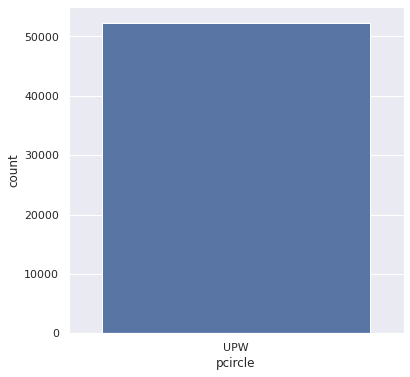

In [564]:
#Plotting the countplot for the "pcircle" column of the dataset.
sns.set(rc={'figure.figsize':(6,6)})
sns.countplot(x="pcircle" ,data=df)
plt.show()

We can see that there is only category in pcircle  which is UPW.

In [565]:
#Dropping the column named as pcircle since it has same value throughout the column.
df=df.drop(["pcircle"], axis = 1)

In [566]:
df.shape

(52324, 34)

In [567]:
#Let us convert pdate from object datatype to datetime64 Datatype
df["pdate"]=pd.to_datetime(df["pdate"])

In [568]:
#We are creating three new columns of Year , Month and Date by extracting data from Date column.
df['Year'] = pd.DatetimeIndex(df['pdate']).year
df['Month'] = pd.DatetimeIndex(df['pdate']).month
df['Day'] = pd.DatetimeIndex(df['pdate']).day


In [569]:
#Dropping the column named as pdate since we have extracted the data of month ,year and day.
df=df.drop(["pdate"], axis = 1)

In [570]:
df.shape

(52324, 36)

In [571]:
#Using for loop to seggregate the object datatype and numerical datatypeof columns from the dataframe.
obj=[]
num=[]
for i in df.columns:
    if df.dtypes[i]=="O":
        obj.append(i)
    elif df.dtypes[i]=="float64" or df.dtypes[i]=="int64":
        num.append(i)

In [572]:

len(obj)

32

In [573]:
len(num)

4

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52324 entries, 0 to 52323
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   aon                   52324 non-null  object
 1   daily_decr30          52324 non-null  object
 2   daily_decr90          52324 non-null  object
 3   rental30              52324 non-null  object
 4   rental90              52324 non-null  object
 5   last_rech_date_ma     52324 non-null  object
 6   last_rech_date_da     52324 non-null  object
 7   last_rech_amt_ma      52324 non-null  object
 8   cnt_ma_rech30         52324 non-null  object
 9   fr_ma_rech30          52324 non-null  object
 10  sumamnt_ma_rech30     52324 non-null  object
 11  medianamnt_ma_rech30  52324 non-null  object
 12  medianmarechprebal30  52324 non-null  object
 13  cnt_ma_rech90         52324 non-null  object
 14  fr_ma_rech90          52324 non-null  object
 15  sumamnt_ma_rech90     52324 non-null

In [575]:
#Let us display all columns of the dataframe.
pd.set_option('display.max_columns', None)

In [576]:
df

aon daily_decr30 daily_decr90 rental30 rental90 last_rech_date_ma  \
0       272      3055.05      3065.15   220.13   260.13                 2   
1        82      65.1667      65.1667    326.2    326.2                17   
2      1037           12           12   1216.8   1216.8                 0   
3      1583         1000         1000   1000.8  1087.88                 0   
4       378      514.693        515.2    56.26     58.2                 2   
...     ...          ...          ...      ...      ...               ...   
52319  1156        12157      12748.5  5003.24  5508.44                 1   
52320   501      844.821       901.54  11943.8  13872.8                36   
52321   472         4060         4060  1553.36  1600.34                 2   
52322  1208       32.668       32.668     5127     5127                 4   
52323   108         9515      11846.2  2585.07   3295.2                 1   

      last_rech_date_da last_rech_amt_ma cnt_ma_rech30 fr_ma_rech30  \
0                     0             1539             2           21   
1                     0             7526             2            0   
2                     0                0             0            0   
3                     0                0             0            0   
4                     0              773             1            0   
...                 ...              ...           ...          ...   
52319                 0              770             7            4   
52320                 0            11874             0            0   
52321                 0             1539             2            2   
52322                 0             4048             4            0   
52323                 0             1539             7            0   

      sumamnt_ma_rech30 medianamnt_ma_rech30 medianmarechprebal30  \
0                  3078                 1539                  7.5   
1                  9065               4532.5                  489   
2                     0                    0                    0   
3                     0                    0                    0   
4                   773                  773                  542   
...                 ...                  ...                  ...   
52319              8475                  770                25.43   
52320                 0                    0                    0   
52321              3078                 1539                 33.5   
52322             13994               3320.5                 12.5   
52323              9241                 1539                   36   

      cnt_ma_rech90 fr_ma_rech90 sumamnt_ma_rech90 medianamnt_ma_rech90  \
0                 2           21              3078                 1539   
1                 2            0              9065               4532.5   
2                 0            0                 0                    0   
3                 0            0                 0                    0   
4                 2           64              1546                  773   
...             ...          ...               ...                  ...   
52319            18            3             24852                 1539   
52320             4            0             27181                 6687   
52321             2            2              3078                 1539   
52322             4            0             13994               3320.5   
52323            15            3             29080                 1539   

      medianmarechprebal90 cnt_da_rech30 fr_da_rech30 cnt_da_rech90  \
0                      7.5             0            0             0   
1                      489             0            0             0   
2                        0             0            0             0   
3                        0             0            0             0   
4                    283.5             0            0             0   
...                    ...           ...          ...           ...   
523

In [577]:
#Lets see that the value counts in the label columns.
df["label"].value_counts()

1    26162
0    26162
Name: label, dtype: int64

**We can see that classification data is balanced.**

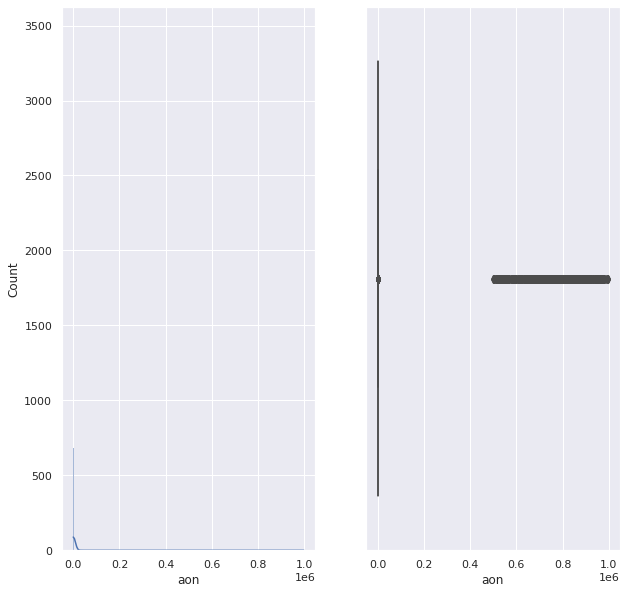

In [578]:
#Lets plot the " aon--->age on cellular network in days " distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['aon'],kde=True, ax=ax1)
sns.boxplot(x=df["aon"],ax=ax2)
plt.show()


**We can see that age of cellular network in days is heavily skewed to the right side.**

In [579]:
df["aon"].skew()

9.962294469909441

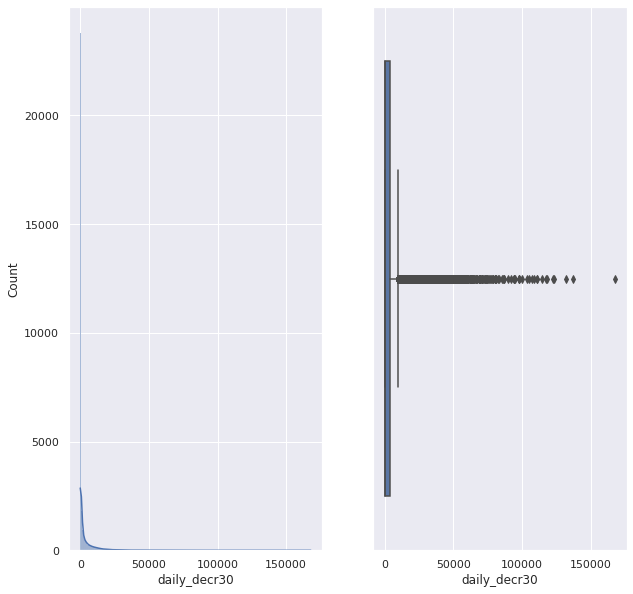

In [580]:
#Lets plot the " daily_decr30--->Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah) " distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['daily_decr30'],kde=True, ax=ax1)
sns.boxplot(x=df["daily_decr30"],ax=ax2)
plt.show()

**We can see that Daily amount spent from main account, averaged over last 30 days column skewed to the right side.**

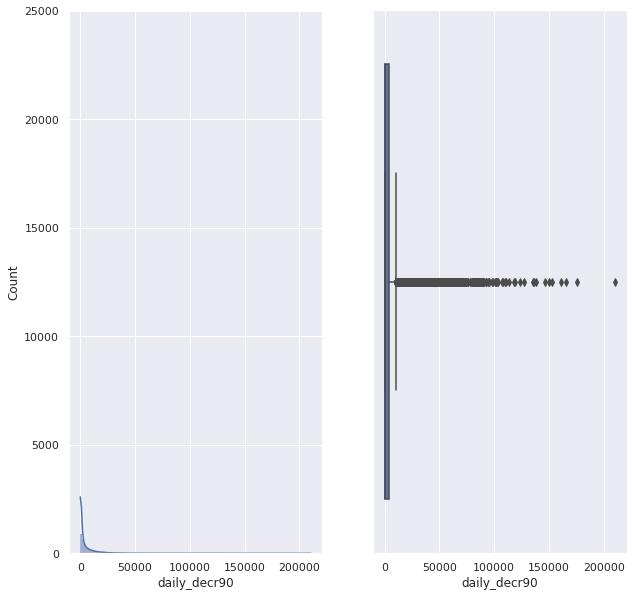

In [581]:
#Lets plot the " daily_decr90--->Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['daily_decr90'],kde=True, ax=ax1)
sns.boxplot(x=df["daily_decr90"],ax=ax2)
plt.show()

**Daily amount spent from main account, averaged over last 90 days is heavily skewed to the right side.**

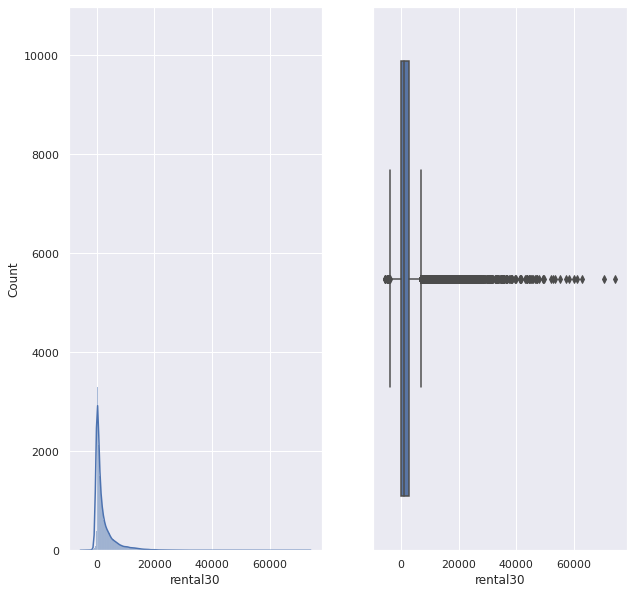

In [582]:
#Lets plot the " rental30--->Average main account balance over last 30 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['rental30'],kde=True, ax=ax1)
sns.boxplot(x=df["rental30"],ax=ax2)
plt.show()

**Average main account balance over last 30 days column is skewed to the right side.**

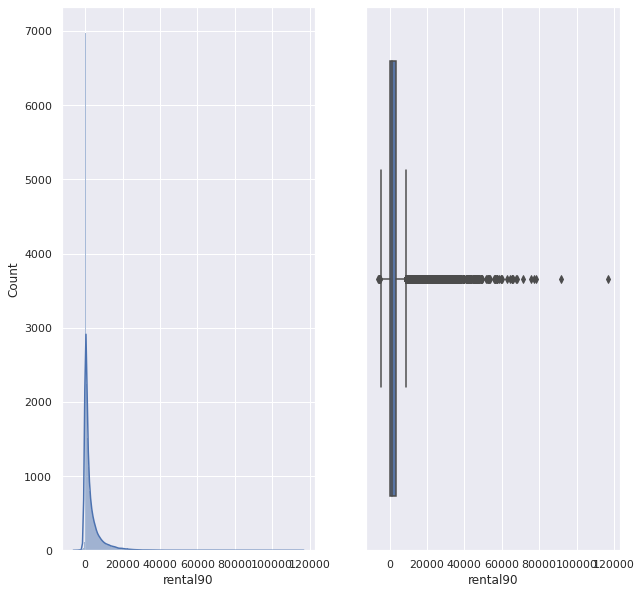

In [583]:
#Lets plot the " rental90--->Average main account balance over last 90 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['rental90'],kde=True, ax=ax1)
sns.boxplot(x=df["rental90"],ax=ax2)
plt.show()

**Average main account balance over last 90 days ,column is heavily skewed to the right side.**

In [584]:
#Lets plot the " last_rech_date_ma--->Number of days till last recharge of main account" distribution curve.  
#sns.histplot(data=df, x="last_rech_date_ma", kde=True)

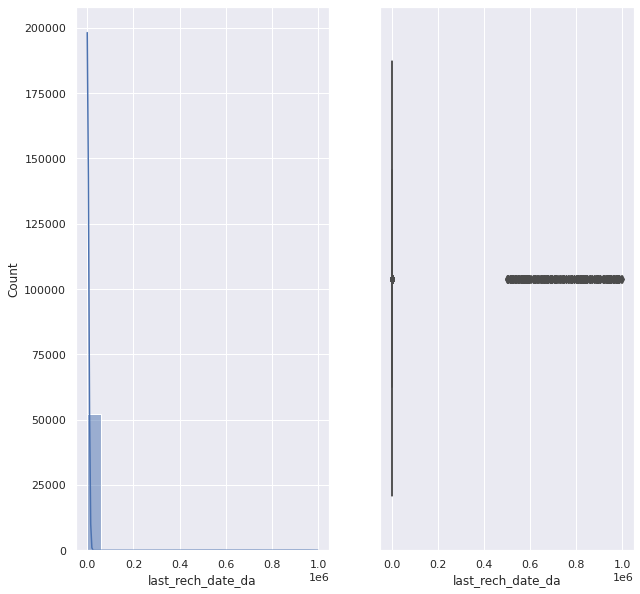

In [585]:
#Lets plot the " last_rech_date_da--->Number of days till last recharge of data account" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['last_rech_date_da'],kde=True, ax=ax1)
sns.boxplot(x=df["last_rech_date_da"],ax=ax2)
plt.show()

**Number of days till last recharge of data account column is skewed to the right side.**

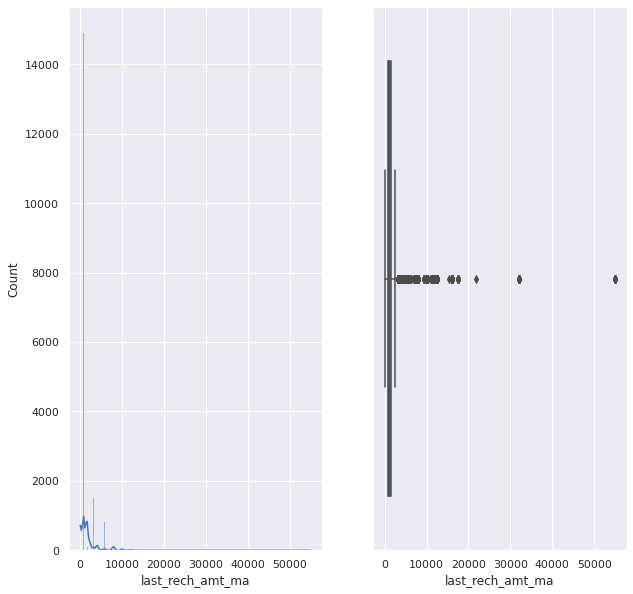

In [586]:
#Lets plot the " last_rech_amt_ma--->Amount of last recharge of main account (in Indonesian Rupiah)" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['last_rech_amt_ma'],kde=True, ax=ax1)
sns.boxplot(x=df["last_rech_amt_ma"],ax=ax2)
plt.show()

**Amount of last recharge of main account (in Indonesian Rupiah) column is skewed to the right side.**

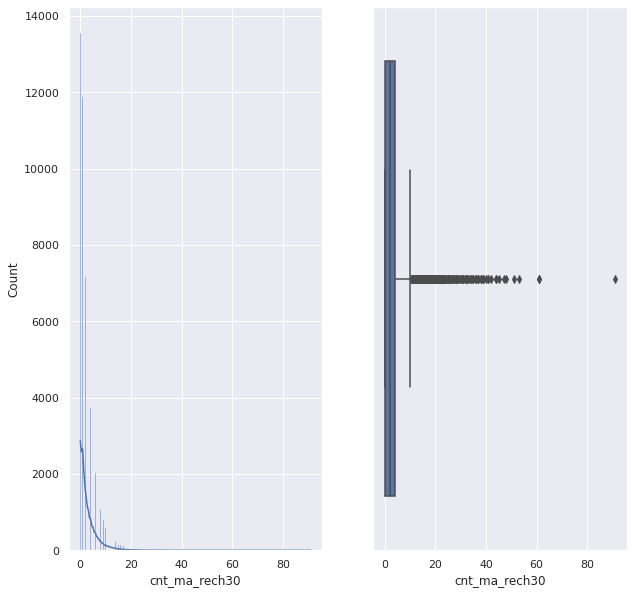

In [587]:
#Lets plot the " cnt_ma_rech30--->Number of times main account got recharged in last 30 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['cnt_ma_rech30'],kde=True, ax=ax1)
sns.boxplot(x=df["cnt_ma_rech30"],ax=ax2)
plt.show()

**Number of times main account got recharged in last 30 days column is skewed to the right side.**

In [588]:
#Lets plot the "fr_ma_rech30--->Frequency of main account recharged in last 30 days" distribution curve.  
#sns.histplot(data=df, x="fr_ma_rech30", kde=True)

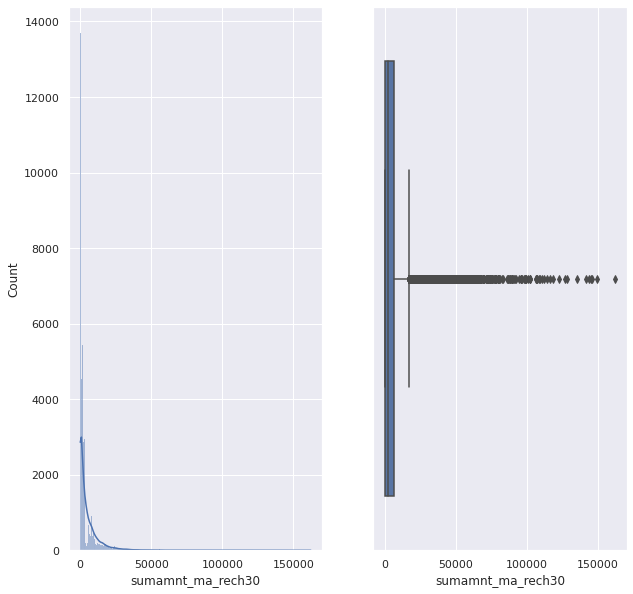

In [589]:
#Lets plot the "sumamnt_ma_rech30--->Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['sumamnt_ma_rech30'],kde=True, ax=ax1)
sns.boxplot(x=df["sumamnt_ma_rech30"],ax=ax2)
plt.show()

**Total amount of recharge in main account over last 30 days (in Indonesian Rupiah) column is heavily skewed to the right side.**

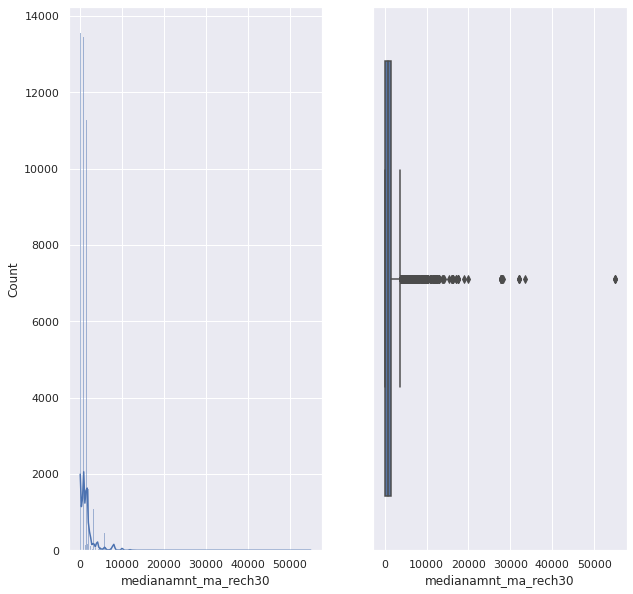

In [590]:
#Lets plot the "medianamnt_ma_rech30--->Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['medianamnt_ma_rech30'],kde=True, ax=ax1)
sns.boxplot(x=df["medianamnt_ma_rech30"],ax=ax2)
plt.show()

**Median of amount of recharges done in main account over last 30 days at user level,column is skewed to the right side.**

In [591]:
#Lets plot the "medianmarechprebal30--->Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)" distribution curve.  
#sns.histplot(data=df, x="medianmarechprebal30", kde=True)

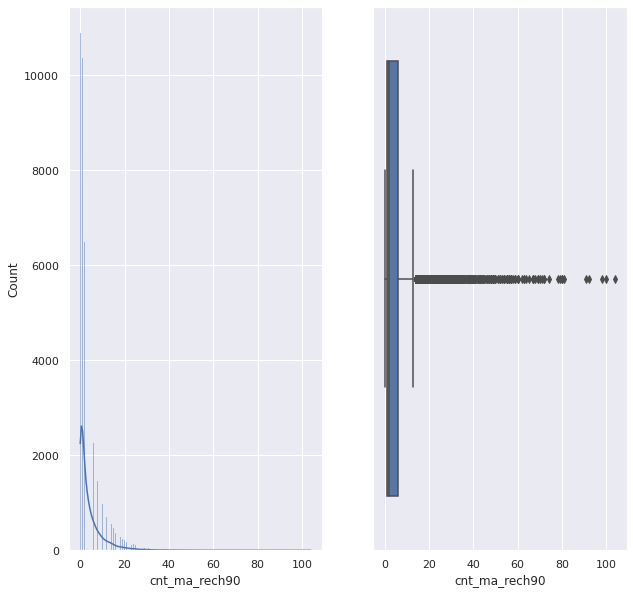

In [592]:
#Lets plot the "cnt_ma_rech90--->Number of times main account got recharged in last 90 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['cnt_ma_rech90'],kde=True, ax=ax1)
sns.boxplot(x=df["cnt_ma_rech90"],ax=ax2)
plt.show()

**Number of times main account got recharged in last 90 days column is heavily skewed to the right side.**

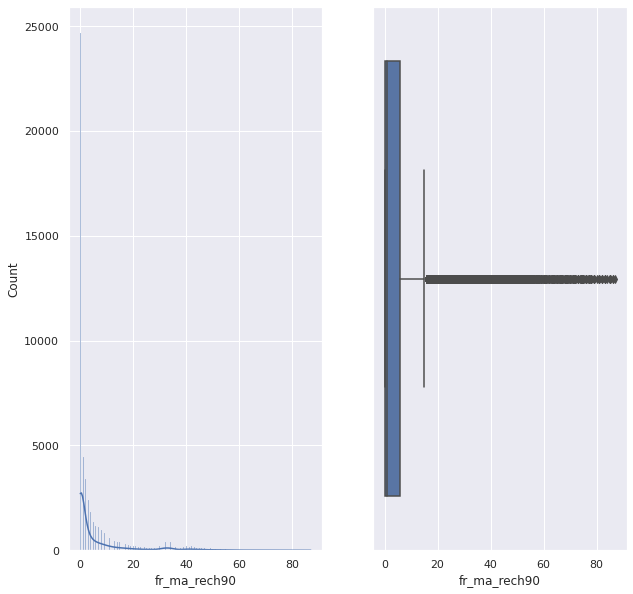

In [593]:
#Lets plot the "fr_ma_rech90--->Frequency of main account recharged in last 90 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['fr_ma_rech90'],kde=True, ax=ax1)
sns.boxplot(x=df["fr_ma_rech90"],ax=ax2)
plt.show()

**Frequency of main account recharged in last 90 days column is heavily skewed to the right hand side.**

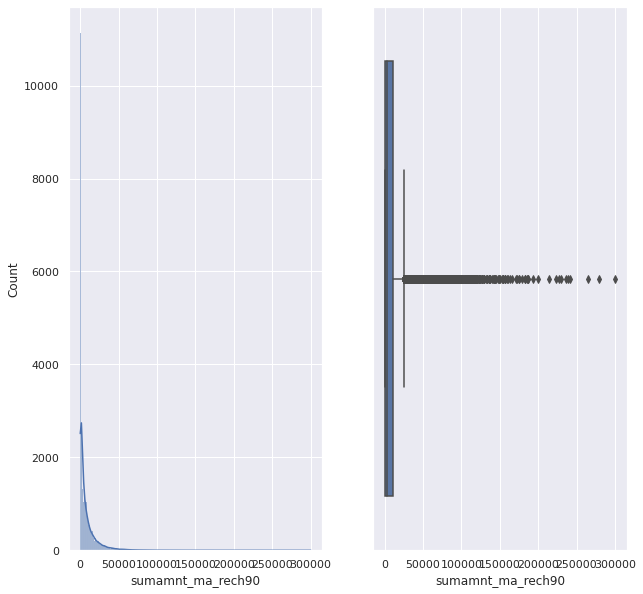

In [594]:
#Lets plot the "sumamnt_ma_rech90--->Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['sumamnt_ma_rech90'],kde=True, ax=ax1)
sns.boxplot(x=df["sumamnt_ma_rech90"],ax=ax2)
plt.show()

**Total amount of recharge in main account over last 90 days (in Indonasian Rupiah) column is heavily skewed to the right hand side.**

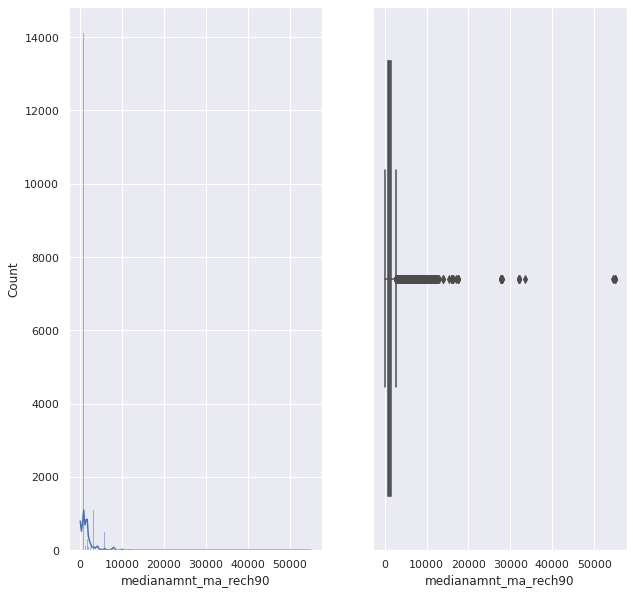

In [595]:
#Lets plot the "medianamnt_ma_rech90--->Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['medianamnt_ma_rech90'],kde=True, ax=ax1)
sns.boxplot(x=df["medianamnt_ma_rech90"],ax=ax2)
plt.show()

**Median of amount of recharges done in main account over last 90 days at user level column is heavily skewed to the right hand side.**

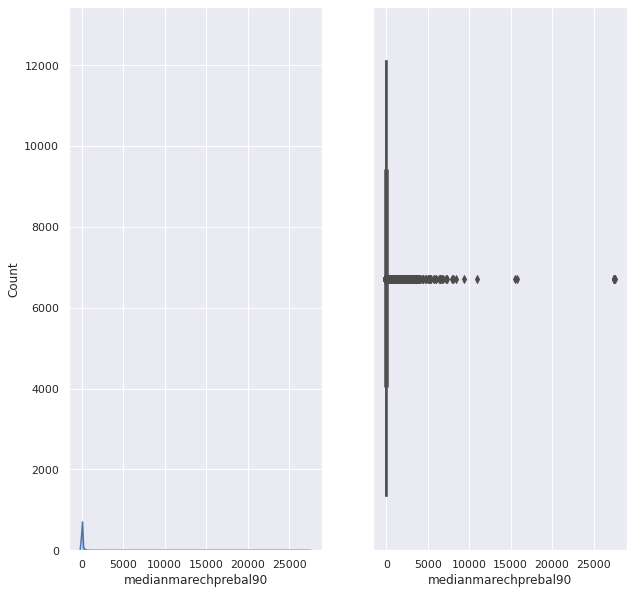

In [596]:
#Lets plot the "medianmarechprebal90--->Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['medianmarechprebal90'],kde=True, ax=ax1)
sns.boxplot(x=df["medianmarechprebal90"],ax=ax2)
plt.show()

**Median of main account balance just before recharge in last 90 days at user level column is heavily skewed to the right hand side.**

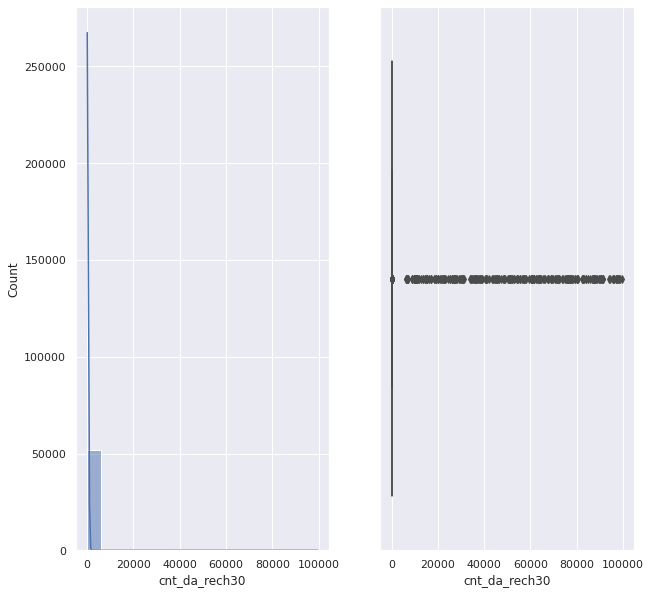

In [597]:
#Lets plot the "cnt_da_rech30--->Number of times data account got recharged in last 30 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['cnt_da_rech30'],kde=True, ax=ax1)
sns.boxplot(x=df["cnt_da_rech30"],ax=ax2)
plt.show()

**Number of times data account got recharged in last 30 days column is heavily skewed to the right hand side.**

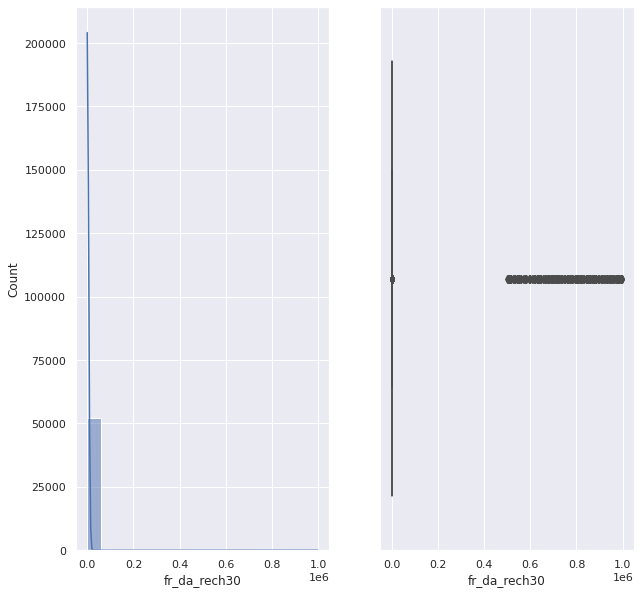

In [598]:
#Lets plot the "fr_da_rech30--->Frequency of data account recharged in last 30 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['fr_da_rech30'],kde=True, ax=ax1)
sns.boxplot(x=df["fr_da_rech30"],ax=ax2)
plt.show()

Frequency of data account recharged in last 30 days, column is heavily skewed to the right hand side.

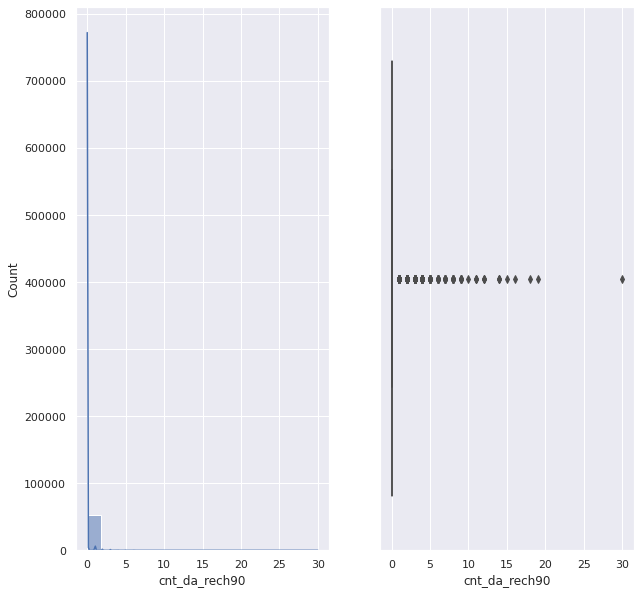

In [599]:
#Lets plot the "cnt_da_rech90--->Number of times data account got recharged in last 90 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['cnt_da_rech90'],kde=True, ax=ax1)
sns.boxplot(x=df["cnt_da_rech90"],ax=ax2)
plt.show()

**Number of times data account got recharged in last 90 days column is heavily skewed to the right hand side.**

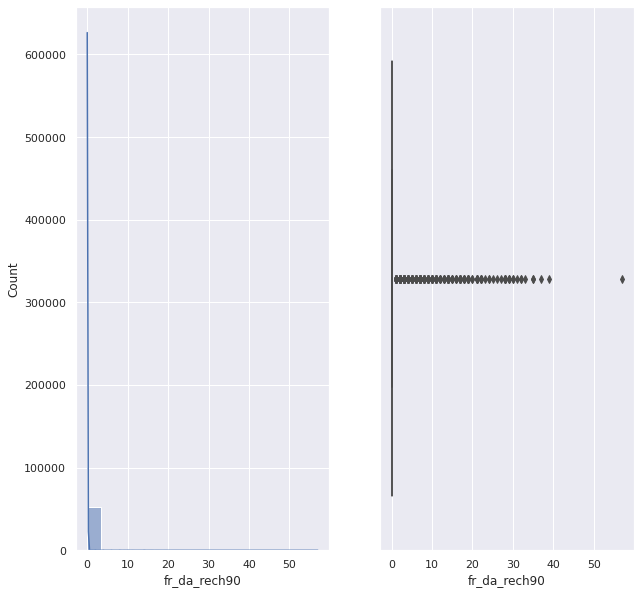

In [600]:
#Lets plot the "fr_da_rech90--->Frequency of data account recharged in last 90 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['fr_da_rech90'],kde=True, ax=ax1)
sns.boxplot(x=df["fr_da_rech90"],ax=ax2)
plt.show()

**Frequency of data account recharged in last 90 days column is heavily skewed to the right hand side.**

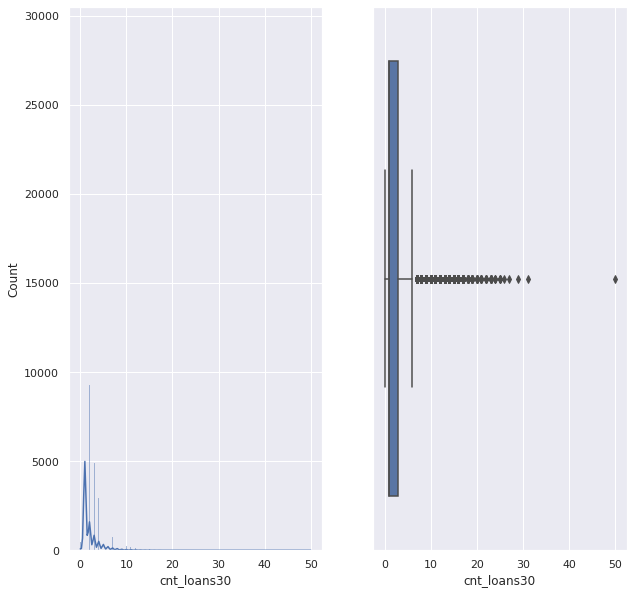

In [601]:
#Lets plot the "cnt_loans30--->Number of loans taken by user in last 30 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['cnt_loans30'],kde=True, ax=ax1)
sns.boxplot(x=df["cnt_loans30"],ax=ax2)
plt.show()

**Number of loans taken by user in last 30 days column is heavily skewed to the right hand side.**

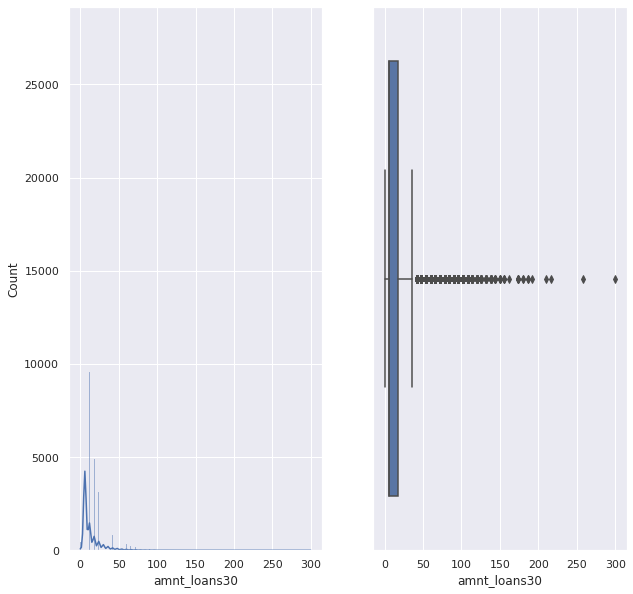

In [602]:
#Lets plot the "amnt_loans30--->Total amount of loans taken by user in last 30 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['amnt_loans30'],kde=True, ax=ax1)
sns.boxplot(x=df["amnt_loans30"],ax=ax2)
plt.show()

**Total amount of loans taken by user in last 30 days column is heavily skewed to the right hand side.**

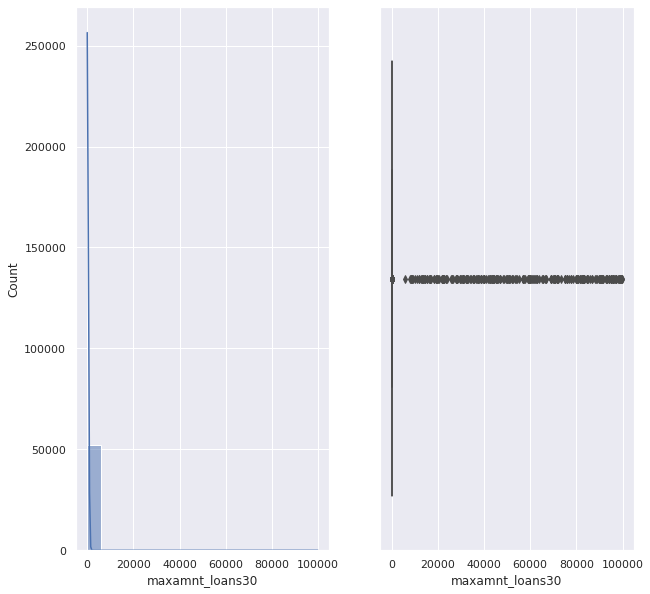

In [603]:
#Lets plot the "maxamnt_loans30--->maximum amount of loan taken by the user in last 30 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['maxamnt_loans30'],kde=True, ax=ax1)
sns.boxplot(x=df["maxamnt_loans30"],ax=ax2)
plt.show()

**maximum amount of loan taken by the user in last 30 days column is heavily skewed to the right hand side.**

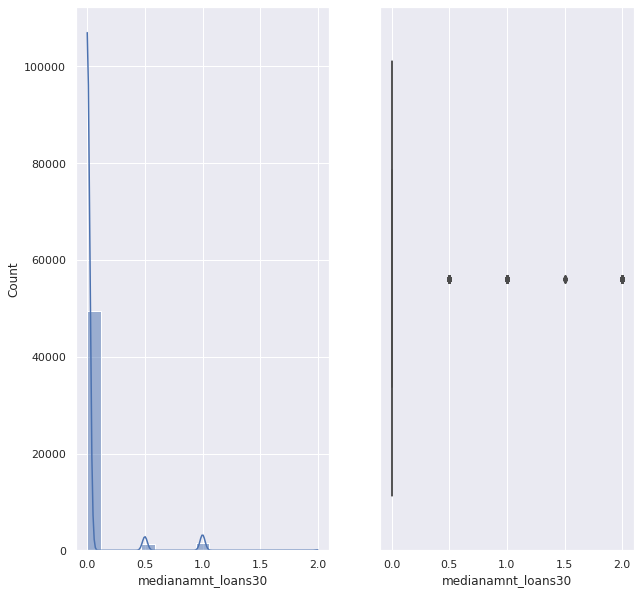

In [604]:
#Lets plot the "medianamnt_loans30--->Median of amounts of loan taken by the user in last 30 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['medianamnt_loans30'],kde=True, ax=ax1)
sns.boxplot(x=df["medianamnt_loans30"],ax=ax2)
plt.show()

**Median of amounts of loan taken by the user in last 30 days column is skewed to the right hand side.**

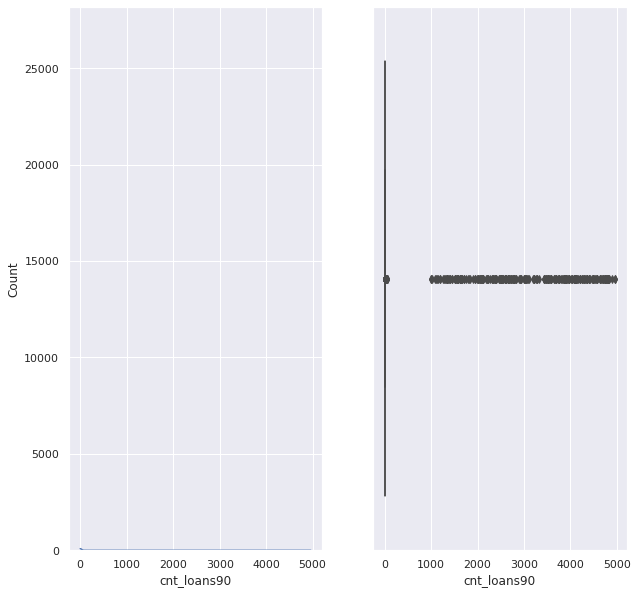

In [605]:
#Lets plot the "cnt_loans90--->Number of loans taken by user in last 90 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['cnt_loans90'],kde=True, ax=ax1)
sns.boxplot(x=df["cnt_loans90"],ax=ax2)
plt.show()

**Number of loans taken by user in last 90 days column is heavily skewed to the right hand side.**

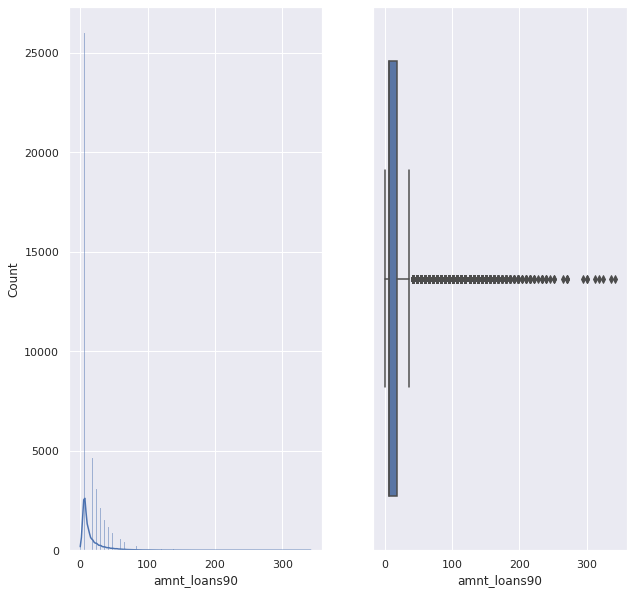

In [606]:
#Lets plot the "amnt_loans90--->Total amount of loans taken by user in last 90 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['amnt_loans90'],kde=True, ax=ax1)
sns.boxplot(x=df["amnt_loans90"],ax=ax2)
plt.show()

**Total amount of loans taken by user in last 90 days column is heavily skewed to the right hand side.**

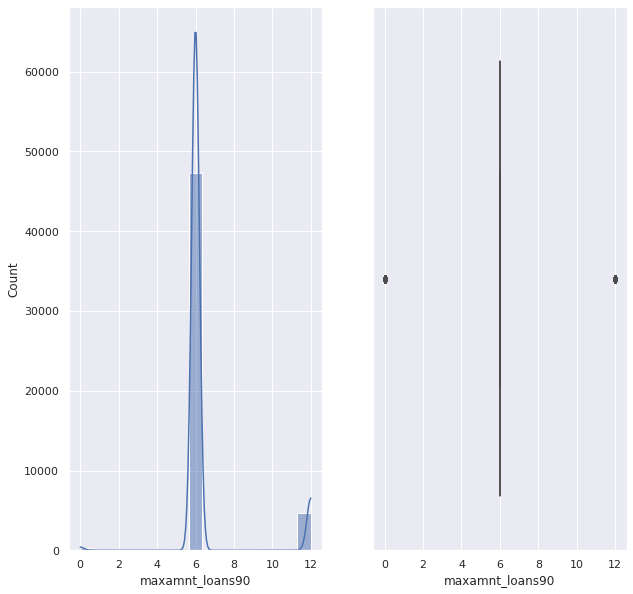

In [607]:
#Lets plot the "maxamnt_loans90--->maximum amount of loan taken by the user in last 90 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['maxamnt_loans90'],kde=True, ax=ax1)
sns.boxplot(x=df["maxamnt_loans90"],ax=ax2)
plt.show()

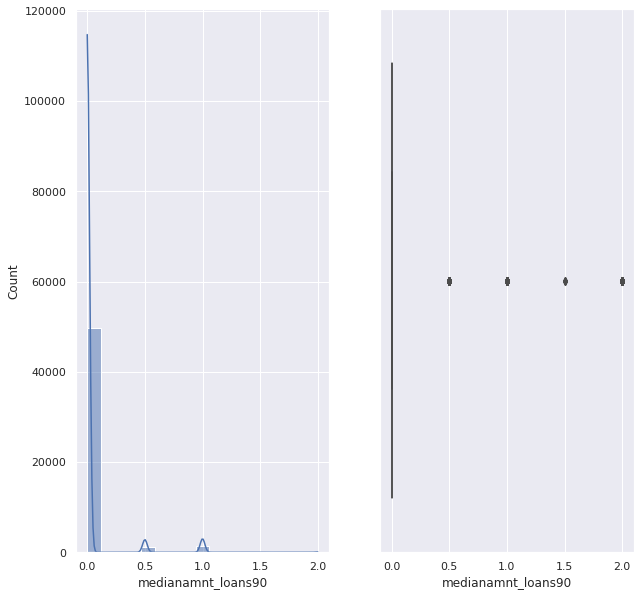

In [608]:
#Lets plot the "medianamnt_loans90--->Median of amounts of loan taken by the user in last 90 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['medianamnt_loans90'],kde=True, ax=ax1)
sns.boxplot(x=df["medianamnt_loans90"],ax=ax2)
plt.show()

**Median of amounts of loan taken by the user in last 90 days column is positively skewed.**

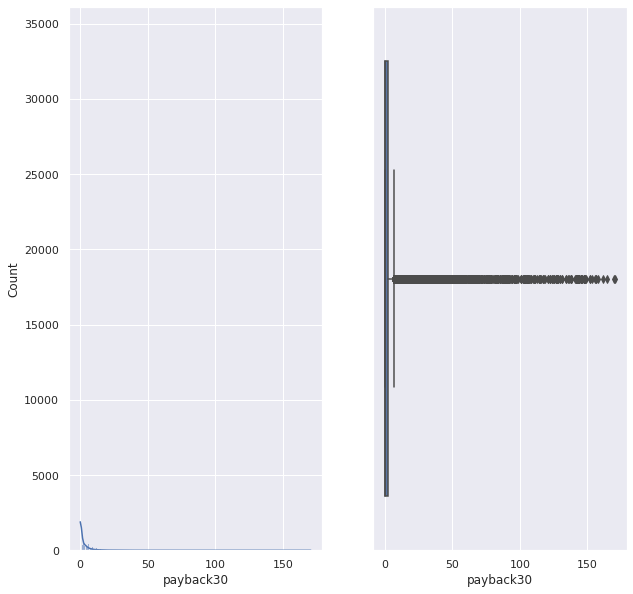

In [609]:
#Lets plot the "payback30--->Average payback time in days over last 30 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['payback30'],kde=True, ax=ax1)
sns.boxplot(x=df["payback30"],ax=ax2)
plt.show()

**Average payback time in days over last 30 days column is heavily skewed to the right hand side.**

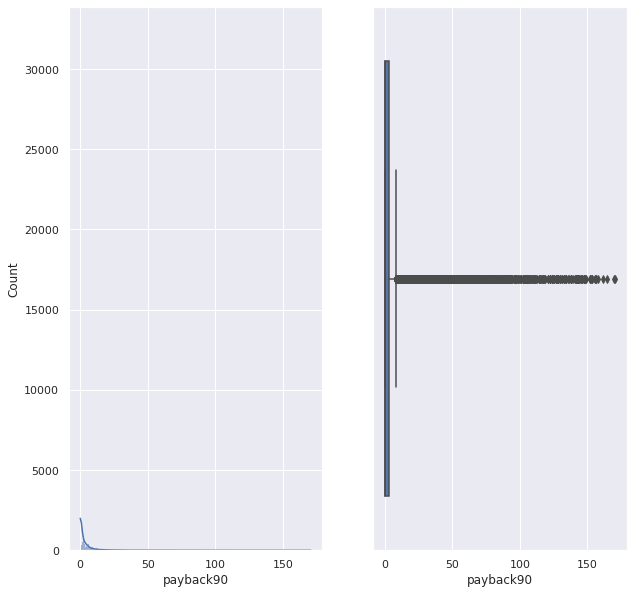

In [610]:
#Lets plot the "payback90--->Average payback time in days over last 90 days" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['payback90'],kde=True, ax=ax1)
sns.boxplot(x=df["payback90"],ax=ax2)
plt.show()

**Average payback time in days over last 90 days column is heavily skewed to the right hand side.**

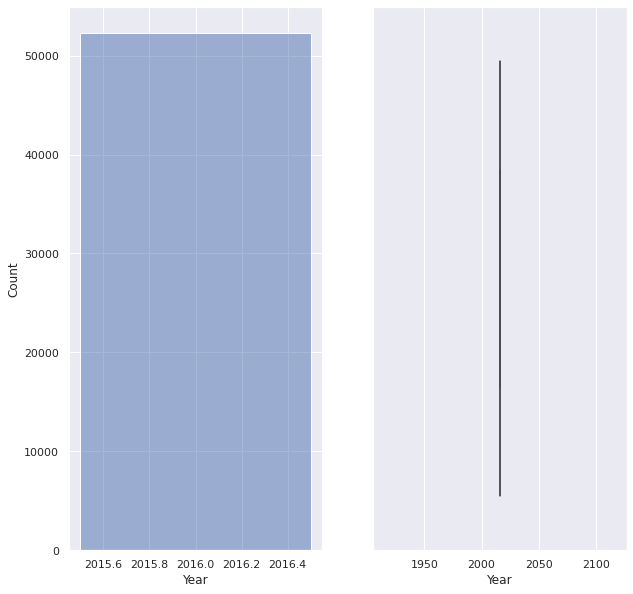

In [611]:
#Lets plot the "Year--->" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['Year'],kde=True, ax=ax1)
sns.boxplot(x=df["Year"],ax=ax2)
plt.show()

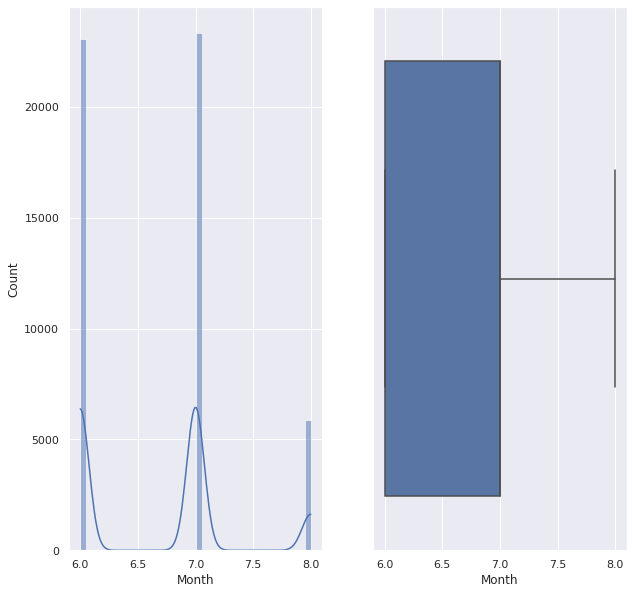

In [612]:
#Lets plot the "Month--->" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['Month'],kde=True, ax=ax1)
sns.boxplot(x=df["Month"],ax=ax2)
plt.show()

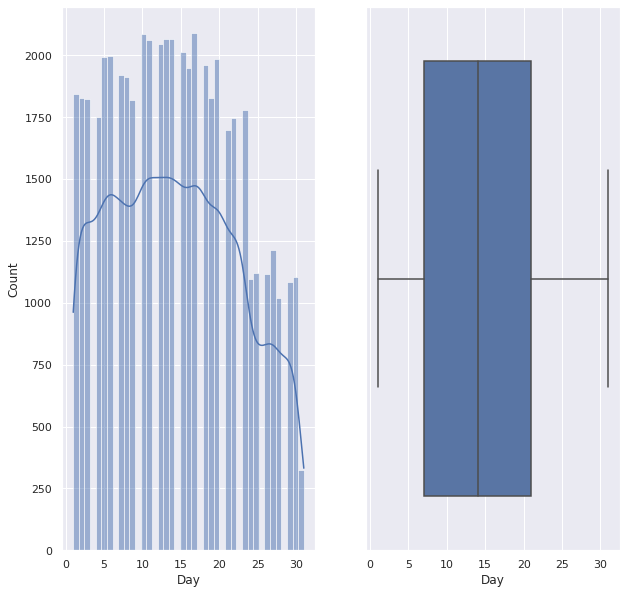

In [613]:
#Lets plot the "Day--->" distribution curve.  
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['Day'],kde=True, ax=ax1)
sns.boxplot(x=df["Day"],ax=ax2)
plt.show()

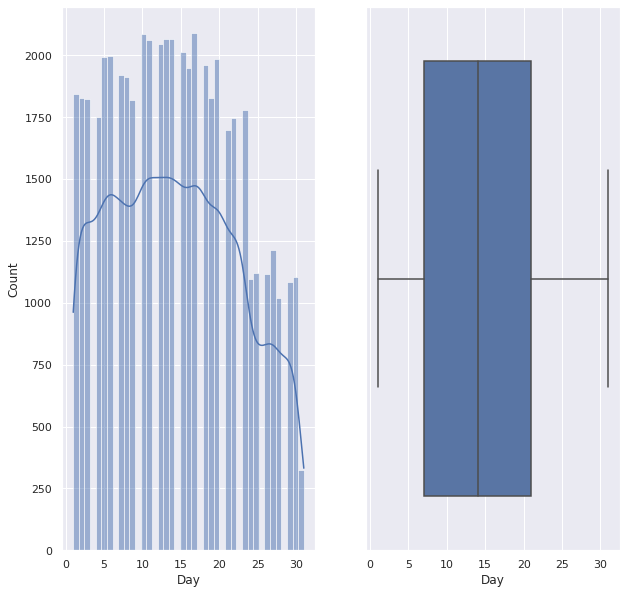

In [614]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,10))
sns.histplot(df['Day'],kde=True, ax=ax1)
sns.boxplot(x=df["Day"],ax=ax2)
plt.show()

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52324 entries, 0 to 52323
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   aon                   52324 non-null  object
 1   daily_decr30          52324 non-null  object
 2   daily_decr90          52324 non-null  object
 3   rental30              52324 non-null  object
 4   rental90              52324 non-null  object
 5   last_rech_date_ma     52324 non-null  object
 6   last_rech_date_da     52324 non-null  object
 7   last_rech_amt_ma      52324 non-null  object
 8   cnt_ma_rech30         52324 non-null  object
 9   fr_ma_rech30          52324 non-null  object
 10  sumamnt_ma_rech30     52324 non-null  object
 11  medianamnt_ma_rech30  52324 non-null  object
 12  medianmarechprebal30  52324 non-null  object
 13  cnt_ma_rech90         52324 non-null  object
 14  fr_ma_rech90          52324 non-null  object
 15  sumamnt_ma_rech90     52324 non-null

In [617]:
#Checking the columns with object datatype ,and adding object datatype columns to a new list object_.
object_=[]
for i in df.columns:
  if df[i].dtypes=="object":
    object_.append(i)

In [618]:
object_

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'last_rech_amt_ma',
 'cnt_ma_rech30',
 'fr_ma_rech30',
 'sumamnt_ma_rech30',
 'medianamnt_ma_rech30',
 'medianmarechprebal30',
 'cnt_ma_rech90',
 'fr_ma_rech90',
 'sumamnt_ma_rech90',
 'medianamnt_ma_rech90',
 'medianmarechprebal90',
 'cnt_da_rech30',
 'fr_da_rech30',
 'cnt_da_rech90',
 'fr_da_rech90',
 'cnt_loans30',
 'amnt_loans30',
 'maxamnt_loans30',
 'medianamnt_loans30',
 'cnt_loans90',
 'amnt_loans90',
 'maxamnt_loans90',
 'medianamnt_loans90',
 'payback30',
 'payback90']

In [619]:
len(object_)

32

In [620]:
#Changing the object datatype to integer datatype.
for i in object_:
  df[i] = df[i].astype(object).astype(int)

In [621]:
#Checking the information about the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52324 entries, 0 to 52323
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   aon                   52324 non-null  int64
 1   daily_decr30          52324 non-null  int64
 2   daily_decr90          52324 non-null  int64
 3   rental30              52324 non-null  int64
 4   rental90              52324 non-null  int64
 5   last_rech_date_ma     52324 non-null  int64
 6   last_rech_date_da     52324 non-null  int64
 7   last_rech_amt_ma      52324 non-null  int64
 8   cnt_ma_rech30         52324 non-null  int64
 9   fr_ma_rech30          52324 non-null  int64
 10  sumamnt_ma_rech30     52324 non-null  int64
 11  medianamnt_ma_rech30  52324 non-null  int64
 12  medianmarechprebal30  52324 non-null  int64
 13  cnt_ma_rech90         52324 non-null  int64
 14  fr_ma_rech90          52324 non-null  int64
 15  sumamnt_ma_rech90     52324 non-null  int64
 16  medi

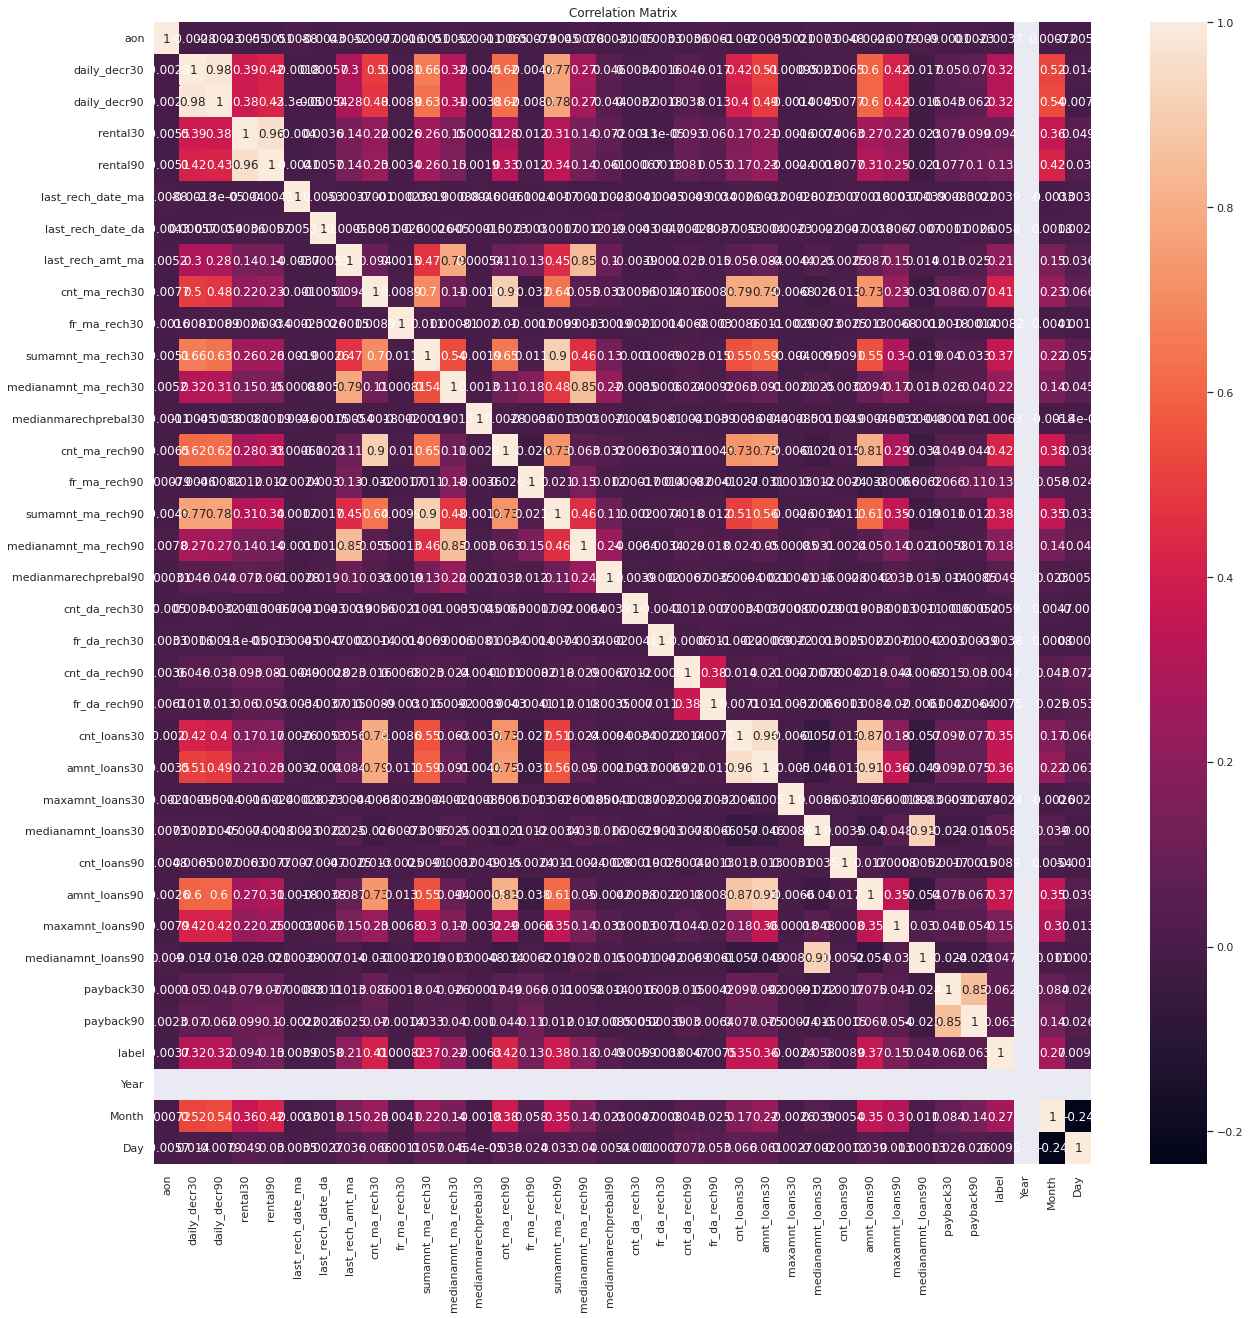

In [622]:
#Lets plot the heatmap to check the correlation between dependent and independent variables.
corr_mat=df.corr()
plt.figure(figsize=[21,21])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [623]:
#Getting the numerical values of correlation
corr_matrix=df.corr()
corr_matrix["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech90           0.422299
cnt_ma_rech30           0.412335
sumamnt_ma_rech90       0.377581
amnt_loans90            0.368562
sumamnt_ma_rech30       0.366571
amnt_loans30            0.357254
cnt_loans30             0.352242
daily_decr90            0.317694
daily_decr30            0.317470
Month                   0.266932
medianamnt_ma_rech30    0.221086
last_rech_amt_ma        0.207674
medianamnt_ma_rech90    0.183482
maxamnt_loans90         0.154219
rental90                0.128086
fr_ma_rech90            0.127230
rental30                0.093839
payback90               0.063307
payback30               0.061703
medianamnt_loans30      0.058336
medianmarechprebal90    0.049326
medianamnt_loans90      0.046902
Day                     0.009476
cnt_loans90             0.008919
cnt_da_rech30           0.005870
last_rech_date_da       0.005825
cnt_da_rech90           0.004663
last_rech_date_ma       0.003915
fr_ma_rech30            0.000817
maxamnt_lo

**We can see that following columns have some good correlation with target column label.**

cnt_ma_rech90 ------------> 0.422299

cnt_ma_rech30-------------> 0.412335

sumamnt_ma_rech90-----------> 0.377581

amnt_loans90 ---------------> 0.368562

sumamnt_ma_rech30-------------> 0.366571

amnt_loans30------------------> 0.357254

cnt_loans30 ----------------> 0.352242

daily_decr90 ----------------> 0.317694

daily_decr30 ------------------> 0.317470

In [624]:
#Defining a function which return the list of indices where outliers are present.
def outliers(dataframe,feature):
    Q1=dataframe[feature].quantile(0.25)
    Q3=dataframe[feature].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    ls=dataframe.index[(dataframe[feature]<lower_bound) | (dataframe[feature]>upper_bound)]
    return ls

In [625]:
#Create an empty list to store the output indices from the multiple columns.

index_list=[]
for feature in df.columns:
    index_list.extend(outliers(df,feature))

In [626]:
#Showing the index of those rows which have outliers.
index_list
len(index_list)

133921

In [627]:
#Creating an empty list in which we will add those rows which have the outlier.
rows_out = []
for i in index_list:
    if i not in rows_out:
        rows_out.append(i)

In [628]:
#Checking the number of rows which have the outlier.
len(rows_out)

34015

In [629]:
#define  a function called remove  which returns a cleaned dataframe without outliers
def remove(dataframe,index_list):
    index_list=sorted(set(index_list))
    dataframe=dataframe.drop(index_list)
    return dataframe

In [630]:
#df_cleaned=remove(df,index_list)

In [631]:
#Cheking the values of the column Year.
df["Year"].value_counts()

2016    52324
Name: Year, dtype: int64

**We can see that "Year" column has only one value throughout.Hence we can remove this column from the dataset.**

In [632]:
#Checking the values of the "Month" column.
df["Month"].value_counts()

7    23357
6    23083
8     5884
Name: Month, dtype: int64

In [633]:
df['Day'].value_counts()

17    2091
10    2087
13    2067
14    2065
11    2063
12    2046
15    2014
6     1998
5     1992
20    1983
18    1960
16    1948
7     1918
8     1911
1     1844
19    1828
2     1827
3     1822
9     1819
23    1780
4     1751
22    1745
21    1696
27    1212
25    1118
26    1114
30    1102
24    1094
29    1084
28    1019
31     326
Name: Day, dtype: int64

In [634]:
df.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0   272          3055          3065       220       260                  2   
1    82            65            65       326       326                 17   
2  1037            12            12      1216      1216                  0   
3  1583          1000          1000      1000      1087                  0   
4   378           514           515        56        58                  2   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                  0              1539              2            21   
1                  0              7526              2             0   
2                  0                 0              0             0   
3                  0                 0              0             0   
4                  0               773              1             0   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
0               3078                  1539                     7   
1               9065                  4532                   489   
2                  0                     0                     0   
3                  0                     0                     0   
4                773                   773                   542   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0              2            21               3078                  1539   
1              2             0               9065                  4532   
2              0             0                  0                     0   
3              0             0                  0                     0   
4              2            64               1546                   773   

   medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0                     7              0             0              0   
1                   489              0             0              0   
2                     0              0             0              0   
3                     0              0             0              0   
4                   283              0             0              0   

   fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0             0            2            12                6   
1             0            1             6                6   
2             0            1             6                6   
3             0            1             6                6   
4             0            2            12                6   

   medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                   0            2            12                6   
1                   0            1             6                6   
2                   0            1             6                6   
3                   0            1             6                6   
4                   0            2            12                6   

   medianamnt_loans90  payback30  payback90  label  Year  Month  Day  
0                   0         29         29      0  2016      7   20  
1                   0          0          0      0  2016      6   20  
2                   0          0          0      0  2016      6   24  
3                   0          0          0      0  2016      7    4  
4                   0          0          0      0  2016      7    1

In [635]:
#Creating a logic to classify the day into three categories (First_Part_Month,Second_Part_Month,Third_Part_Month)
for i in df.index:
  if df.loc[i,"Day"]<=10:
    df.loc[i,"Day"]='First_Part_Month'
  elif 10< df.loc[i,"Day"]<=20:
    df.loc[i,"Day"]='Second_Part_Month'
  else:
    df.loc[i,"Day"]="Third_Part_Month"

In [636]:
df

aon  daily_decr30  daily_decr90  rental30  rental90  \
0       272          3055          3065       220       260   
1        82            65            65       326       326   
2      1037            12            12      1216      1216   
3      1583          1000          1000      1000      1087   
4       378           514           515        56        58   
...     ...           ...           ...       ...       ...   
52319  1156         12157         12748      5003      5508   
52320   501           844           901     11943     13872   
52321   472          4060          4060      1553      1600   
52322  1208            32            32      5127      5127   
52323   108          9515         11846      2585      3295   

       last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                      2                  0              1539              2   
1                     17                  0              7526              2   
2                      0                  0                 0              0   
3                      0                  0                 0              0   
4                      2                  0               773              1   
...                  ...                ...               ...            ...   
52319                  1                  0               770              7   
52320                 36                  0             11874              0   
52321                  2                  0              1539              2   
52322                  4                  0              4048              4   
52323                  1                  0              1539              7   

       fr_ma_rech30  sumamnt_ma_rech30  medianamnt_ma_rech30  \
0                21               3078                  1539   
1                 0               9065                  4532   
2                 0                  0                     0   
3                 0                  0                     0   
4                 0                773                   773   
...             ...                ...                   ...   
52319             4               8475                   770   
52320             0                  0                     0   
52321             2               3078                  1539   
52322             0              13994                  3320   
52323             0               9241                  1539   

       medianmarechprebal30  cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  \
0                         7              2            21               3078   
1                       489              2             0               9065   
2                         0              0             0                  0   
3                         0              0             0                  0   
4                       542              2            64               1546   
...                     ...            ...           ...                ...   
52319                    25             18             3              24852   
52320                     0              4             0              27181   
52321                    33              2             2               3078   
52322                    12              4             0              13994   
52323                    36             15             3              29080   

       medianamnt_ma_rech90  medianmarechprebal90  cnt_da_rech30  \
0                      1539                     7              0   
1                      4532                   489              0   
2                         0                     0              0   
3                         0                     0              0   
4                       773                   283              0   
...                     ...                   ...            ...   
52319                  1539                    32              0   
52320                  6687 

In [637]:
df["Day"].value_counts()

Second_Part_Month    20065
First_Part_Month     18969
Third_Part_Month     13290
Name: Day, dtype: int64

In [638]:
df["maxamnt_loans90"].value_counts()

6     47318
12     4725
0       281
Name: maxamnt_loans90, dtype: int64

In [639]:
df["cnt_da_rech90"].value_counts()

0     51162
1       825
2       148
3        76
4        41
5        19
6        11
8        10
7        10
9         7
11        3
12        3
14        3
19        1
10        1
15        1
16        1
18        1
30        1
Name: cnt_da_rech90, dtype: int64

In [640]:
#Dropping year column since it has same value throughout the column.
df=df.drop(["Year"], axis = 1)

In [641]:
#Creating dummy columns for the nominal categorical variables and dropping one column from each to counter multicollinearity.
categorical_cols = ["Day","Month","maxamnt_loans90"] 
df = pd.get_dummies(df, columns = categorical_cols,drop_first=True)

In [642]:
df.head()

aon  daily_decr30  daily_decr90  rental30  rental90  last_rech_date_ma  \
0   272          3055          3065       220       260                  2   
1    82            65            65       326       326                 17   
2  1037            12            12      1216      1216                  0   
3  1583          1000          1000      1000      1087                  0   
4   378           514           515        56        58                  2   

   last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  fr_ma_rech30  \
0                  0              1539              2            21   
1                  0              7526              2             0   
2                  0                 0              0             0   
3                  0                 0              0             0   
4                  0               773              1             0   

   sumamnt_ma_rech30  medianamnt_ma_rech30  medianmarechprebal30  \
0               3078                  1539                     7   
1               9065                  4532                   489   
2                  0                     0                     0   
3                  0                     0                     0   
4                773                   773                   542   

   cnt_ma_rech90  fr_ma_rech90  sumamnt_ma_rech90  medianamnt_ma_rech90  \
0              2            21               3078                  1539   
1              2             0               9065                  4532   
2              0             0                  0                     0   
3              0             0                  0                     0   
4              2            64               1546                   773   

   medianmarechprebal90  cnt_da_rech30  fr_da_rech30  cnt_da_rech90  \
0                     7              0             0              0   
1                   489              0             0              0   
2                     0              0             0              0   
3                     0              0             0              0   
4                   283              0             0              0   

   fr_da_rech90  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0             0            2            12                6   
1             0            1             6                6   
2             0            1             6                6   
3             0            1             6                6   
4             0            2            12                6   

   medianamnt_loans30  cnt_loans90  amnt_loans90  medianamnt_loans90  \
0                   0            2            12                   0   
1                   0            1             6                   0   
2                   0            1             6                   0   
3                   0            1             6                   0   
4                   0            2            12                   0   

   payback30  payback90  label  Day_Second_Part_Month  Day_Third_Part_Month  \
0         29         29      0                      1                     0   
1          0          0      0                      1                     0   
2          0          0      0                      0                     1   
3          0          0      0                      0                     0   
4          0          0      0                      0                     0   

   Month_7  Month_8  maxamnt_loans90_6  maxamnt_loans90_12  
0        1        0                  1                   0  
1        0        0                  1                   0  
2        0        0                  1                   0  
3        1        0                  1                   0  
4        1        0                  1                   0

In [643]:
df.shape

(52324, 38)

In [644]:
df['label'].value_counts()

1    26162
0    26162
Name: label, dtype: int64

In [645]:
df.columns

Index(['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'label',
       'Day_Second_Part_Month', 'Day_Third_Part_Month', 'Month_7', 'Month_8',
       'maxamnt_loans90_6', 'maxamnt_loans90_12'],
      dtype='object')

In [646]:
df=df[['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90',
       'Day_Second_Part_Month', 'Day_Third_Part_Month', 'Month_7', 'Month_8',
       'maxamnt_loans90_6', 'maxamnt_loans90_12','label']]

In [647]:
#Bifurcating the dataset into independent and dependent variables.
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [648]:
#Spliiting the dataset for train test and split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=4)

In [649]:
#Performing standard scaling on the dataset.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train = pd.DataFrame(sc.fit_transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(sc.transform(x_test),columns = x_test.columns)

In [650]:
#Importing important metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,plot_roc_curve


**Logistic Regression Model**

In [651]:
#Training Result of Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model="Logistic Regression Model"
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_train)
lr_clf_report = pd.DataFrame(classification_report(y_train,lr_pred,output_dict=True))
print(f"\n************************Training Result of {model}*********************************")
print(f"Accuracy score given by the {model} is :{accuracy_score(y_train,lr_pred)*100:.2f}%")
print("*******************************************************************************************************")
print(f"Classification report given by {model}:\n{lr_clf_report}")
print("*******************************************************************************************************")
print(f" Confusion Matrix given by {model}:\n{confusion_matrix(y_train,lr_pred)}\n")


************************Training Result of Logistic Regression Model*********************************
Accuracy score given by the Logistic Regression Model is :78.58%
*******************************************************************************************************
Classification report given by Logistic Regression Model:
                      0             1  accuracy     macro avg  weighted avg
precision      0.753537      0.827426  0.785757      0.790481      0.790466
recall         0.849556      0.721906  0.785757      0.785731      0.785757
f1-score       0.798671      0.771073  0.785757      0.784872      0.784877
support    20938.000000  20921.000000  0.785757  41859.000000  41859.000000
*******************************************************************************************************
 Confusion Matrix given by Logistic Regression Model:
[[17788  3150]
 [ 5818 15103]]



In [652]:
#Test Result of Logistic Regression Model
lr_pred=lr.predict(x_test)
lr_clf_report = pd.DataFrame(classification_report(y_test,lr_pred,output_dict=True))
print(f"\n********************************Test Result of {model}*****************************************")
print(f"Accuracy score given by the {model} is:{accuracy_score(y_test,lr_pred)*100:.2f}%")
print("*******************************************************************************************************************")
print(f"Classification report given by {model}:\n{lr_clf_report}")
print("*******************************************************************************************************************")
print(f" Confusion Matrix given by {model}:\n{confusion_matrix(y_test,lr_pred)}\n")


********************************Test Result of Logistic Regression Model*****************************************
Accuracy score given by the Logistic Regression Model is:78.87%
*******************************************************************************************************************
Classification report given by Logistic Regression Model:
                     0            1  accuracy     macro avg  weighted avg
precision     0.756775     0.829491  0.788724      0.793133      0.793192
recall        0.849923     0.727724  0.788724      0.788824      0.788724
f1-score      0.800649     0.775282  0.788724      0.787966      0.787945
support    5224.000000  5241.000000  0.788724  10465.000000  10465.000000
*******************************************************************************************************************
 Confusion Matrix given by Logistic Regression Model:
[[4440  784]
 [1427 3814]]



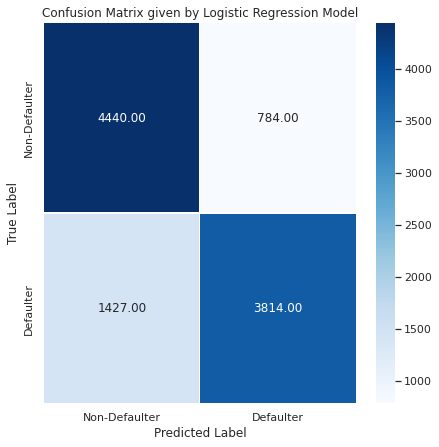

In [653]:
#Lets draw the confusion matrix given by Logistic Regression Model.
cm = confusion_matrix(y_test,lr_pred)
x_axis_labels=['Non-Defaulter','Defaulter']
y_axis_labels=['Non-Defaulter','Defaulter']
ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix given by {model}')
plt.show()

In [654]:
#Checking for the ROC_AUC Score of Logistic Regression model
print(f"***********************ROC_AUC_SCORE given by {model}************************************")
roc_auc_score(y_test,lr.predict(x_test))
print(f"ROC_AUC_SCORE given by {model} is: ",roc_auc_score(y_test,lr.predict(x_test)))

***********************ROC_AUC_SCORE given by Logistic Regression Model************************************
ROC_AUC_SCORE given by Logistic Regression Model is:  0.7888235735847612


**KNN Classifier**

In [655]:
#Training Result of KNN Classifier Model
from sklearn.neighbors import KNeighborsClassifier
model="KNN Classifier Model"
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
kn_pred = kn.predict(x_train)
kn_clf_report = pd.DataFrame(classification_report(y_train,kn_pred,output_dict=True))
print(f"\n************************Training Result of {model}*********************************")
print(f"Accuracy score given by the {model} is :{accuracy_score(y_train,kn_pred)*100:.2f}%")
print("*******************************************************************************************************")
print(f"Classification report given by {model}:\n{kn_clf_report}")
print("*******************************************************************************************************")
print(f" Confusion Matrix given by {model} :\n{confusion_matrix(y_train,kn_pred)}\n")


************************Training Result of KNN Classifier Model*********************************
Accuracy score given by the KNN Classifier Model is :84.45%
*******************************************************************************************************
Classification report given by KNN Classifier Model:
                      0             1  accuracy     macro avg  weighted avg
precision      0.832335      0.857660  0.844526      0.844998      0.844993
recall         0.863024      0.826012  0.844526      0.844518      0.844526
f1-score       0.847402      0.841539  0.844526      0.844470      0.844472
support    20938.000000  20921.000000  0.844526  41859.000000  41859.000000
*******************************************************************************************************
 Confusion Matrix given by KNN Classifier Model :
[[18070  2868]
 [ 3640 17281]]



In [656]:
#Training Result of Logistic Regression Model
kn_pred=kn.predict(x_test)
kn_clf_report = pd.DataFrame(classification_report(y_test,kn_pred,output_dict=True))
print(f"\n********************************Test Result of {model}*****************************************")
print(f"Accuracy score given by the {model} is:{accuracy_score(y_test,kn_pred)*100:.2f}%")
print("*******************************************************************************************************************")
print(f"Classification report given by {model}:\n{kn_clf_report}")
print("*******************************************************************************************************************")
print(f" Confusion Matrix given by {model}:\n{confusion_matrix(y_test,kn_pred)}\n")


********************************Test Result of KNN Classifier Model*****************************************
Accuracy score given by the KNN Classifier Model is:78.47%
*******************************************************************************************************************
Classification report given by KNN Classifier Model:
                     0            1  accuracy     macro avg  weighted avg
precision     0.772919     0.797491  0.784711      0.785205      0.785225
recall        0.805322     0.764167  0.784711      0.784744      0.784711
f1-score      0.788788     0.780474  0.784711      0.784631      0.784624
support    5224.000000  5241.000000  0.784711  10465.000000  10465.000000
*******************************************************************************************************************
 Confusion Matrix given by KNN Classifier Model:
[[4207 1017]
 [1236 4005]]



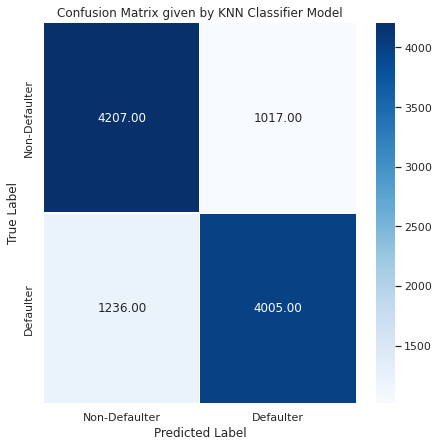

In [657]:
#Lets draw the Confusion matrix given by the KNN Classifier Model.
cm = confusion_matrix(y_test,kn_pred)
x_axis_labels=['Non-Defaulter','Defaulter']
y_axis_labels=['Non-Defaulter','Defaulter']
ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix given by {model}')
plt.show()

In [658]:
#Checking for the ROC_AUC Score of KNN Classifier model
print(f"***********************ROC_AUC_SCORE given by {model}************************************")
roc_auc_score(y_test,kn.predict(x_test))
print(f"ROC_AUC_SCORE given by {model} is: ",roc_auc_score(y_test,kn.predict(x_test)))

***********************ROC_AUC_SCORE given by KNN Classifier Model************************************
ROC_AUC_SCORE given by KNN Classifier Model is:  0.784744368162091


**SVM Classifier Model**

In [659]:
#Training Result of SVM Classifier Model
from sklearn.svm import SVC
model= "SVM Classifier Model"
svm =SVC()
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_train)
svm_clf_report = pd.DataFrame(classification_report(y_train,svm_pred,output_dict=True))
print(f"\n************************Training Result of {model}*********************************")
print(f"Accuracy score given by the {model} is :{accuracy_score(y_train,svm_pred)*100:.2f}%")
print("*******************************************************************************************************")
print(f"Classification report given by {model}:\n{svm_clf_report}")
print("*******************************************************************************************************")
print(f" Confusion Matrix given by {model} :\n{confusion_matrix(y_train,svm_pred)}\n")



************************Training Result of SVM Classifier Model*********************************
Accuracy score given by the SVM Classifier Model is :81.03%
*******************************************************************************************************
Classification report given by SVM Classifier Model:
                      0             1  accuracy     macro avg  weighted avg
precision      0.791478      0.831732  0.810292      0.811605      0.811597
recall         0.842774      0.777783  0.810292      0.810278      0.810292
f1-score       0.816321      0.803853  0.810292      0.810087      0.810090
support    20938.000000  20921.000000  0.810292  41859.000000  41859.000000
*******************************************************************************************************
 Confusion Matrix given by SVM Classifier Model :
[[17646  3292]
 [ 4649 16272]]



In [660]:
#Test Result of SVM Classifier Model.
svm_pred=svm.predict(x_test)
svm_clf_report = pd.DataFrame(classification_report(y_test,svm_pred,output_dict=True))
print(f"\n********************************Test Result of {model}*****************************************")
print(f"Accuracy score given by the  {model} is:{accuracy_score(y_test,svm_pred)*100:.2f}%")
print("*******************************************************************************************************************")
print(f"Classification report given by {model}:\n{svm_clf_report}")
print("*******************************************************************************************************************")
print(f" Confusion Matrix given by {model}:\n{confusion_matrix(y_test,svm_pred)}\n")


********************************Test Result of SVM Classifier Model*****************************************
Accuracy score given by the  SVM Classifier Model is:80.11%
*******************************************************************************************************************
Classification report given by SVM Classifier Model:
                     0            1  accuracy     macro avg  weighted avg
precision     0.785054     0.819063  0.801147      0.802058      0.802086
recall        0.828484     0.773898  0.801147      0.801191      0.801147
f1-score      0.806184     0.795840  0.801147      0.801012      0.801004
support    5224.000000  5241.000000  0.801147  10465.000000  10465.000000
*******************************************************************************************************************
 Confusion Matrix given by SVM Classifier Model:
[[4328  896]
 [1185 4056]]



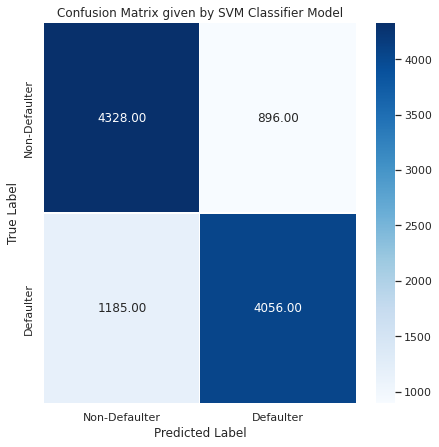

In [661]:
#Lets draw the Confusion matrix given by the SVM Classifier Model.
cm = confusion_matrix(y_test,svm_pred)
x_axis_labels=['Non-Defaulter','Defaulter']
y_axis_labels=['Non-Defaulter','Defaulter']
ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix given by {model}')
plt.show()

In [662]:
#Checking for the ROC_AUC Score of SVM Classifier model
print(f"***********************ROC_AUC_SCORE given by {model}************************************")
roc_auc_score(y_test,svm.predict(x_test))
print(f"ROC_AUC_SCORE given by {model} is: ",roc_auc_score(y_test,svm.predict(x_test)))

***********************ROC_AUC_SCORE given by SVM Classifier Model************************************
ROC_AUC_SCORE given by SVM Classifier Model is:  0.8011910157075223


**Naive Bayes Model**

In [663]:
#Training Result of Gaussian Naive Bayes Classifier Model
from sklearn.naive_bayes import GaussianNB
model="Gaussian Naive Bayes Classifier Model"
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb_pred = gnb.predict(x_train)
gnb_clf_report = pd.DataFrame(classification_report(y_train,gnb_pred,output_dict=True))
print(f"\n************************Training Result of {model}*********************************")
print(f"Accuracy score given by the {model} is :{accuracy_score(y_train,gnb_pred)*100:.2f}%")
print("*******************************************************************************************************")
print(f"Classification report given by {model}:\n{gnb_clf_report}")
print("*******************************************************************************************************")
print(f" Confusion Matrix given by {model} :\n{confusion_matrix(y_train,gnb_pred)}\n")




************************Training Result of Gaussian Naive Bayes Classifier Model*********************************
Accuracy score given by the Gaussian Naive Bayes Classifier Model is :70.08%
*******************************************************************************************************
Classification report given by Gaussian Naive Bayes Classifier Model:
                      0             1  accuracy     macro avg  weighted avg
precision      0.639573      0.858326  0.700805      0.748949      0.748905
recall         0.920718      0.480713  0.700805      0.700716      0.700805
f1-score       0.754816      0.616276  0.700805      0.685546      0.685574
support    20938.000000  20921.000000  0.700805  41859.000000  41859.000000
*******************************************************************************************************
 Confusion Matrix given by Gaussian Naive Bayes Classifier Model :
[[19278  1660]
 [10864 10057]]



In [664]:
#Test Result of Gaussian Naive Bayes Classifier Model
gnb_pred=gnb.predict(x_test)
gnb_clf_report = pd.DataFrame(classification_report(y_test,gnb_pred,output_dict=True))
print(f"\n********************************Test Result of {model}*****************************************")
print(f"Accuracy score given by the  {model} is:{accuracy_score(y_test,gnb_pred)*100:.2f}%")
print("*******************************************************************************************************************")
print(f"Classification report given by {model}:\n{gnb_clf_report}")
print("*******************************************************************************************************************")
print(f" Confusion Matrix given by {model}:\n{confusion_matrix(y_test,gnb_pred)}\n")


********************************Test Result of Gaussian Naive Bayes Classifier Model*****************************************
Accuracy score given by the  Gaussian Naive Bayes Classifier Model is:69.78%
*******************************************************************************************************************
Classification report given by Gaussian Naive Bayes Classifier Model:
                     0            1  accuracy     macro avg  weighted avg
precision     0.637162     0.851965  0.697754      0.744564      0.744738
recall        0.916348     0.479870  0.697754      0.698109      0.697754
f1-score      0.751668     0.613939  0.697754      0.682804      0.682692
support    5224.000000  5241.000000  0.697754  10465.000000  10465.000000
*******************************************************************************************************************
 Confusion Matrix given by Gaussian Naive Bayes Classifier Model:
[[4787  437]
 [2726 2515]]



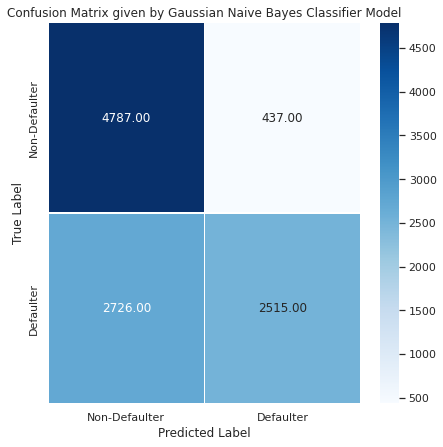

In [665]:
#Lets draw the Confusion matrix given by the Gaussian Naive Bayes Classifier Model.
cm = confusion_matrix(y_test,gnb_pred)
x_axis_labels=['Non-Defaulter','Defaulter']
y_axis_labels=['Non-Defaulter','Defaulter']
ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix given by {model}')
plt.show()

In [666]:
#Checking for the ROC_AUC Score of Gaussian Naive Bayes model
print(f"***********************ROC_AUC_SCORE given by {model}************************************")
roc_auc_score(y_test,gnb.predict(x_test))
print(f"ROC_AUC_SCORE given by {model} is: ",roc_auc_score(y_test,gnb.predict(x_test)))

***********************ROC_AUC_SCORE given by Gaussian Naive Bayes Classifier Model************************************
ROC_AUC_SCORE given by Gaussian Naive Bayes Classifier Model is:  0.698108940054167


**Decision Tree Classifier Model**

In [667]:
#raining Result of Decision Tree Classifier Model
from sklearn.tree import DecisionTreeClassifier
model="Decision Tree Classifier Model"
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc_pred = dtc.predict(x_train)
dtc_clf_report = pd.DataFrame(classification_report(y_train,dtc_pred,output_dict=True))
print(f"\n************************Training Result of {model}*********************************")
print(f"Accuracy score given by the {model} is :{accuracy_score(y_train,dtc_pred)*100:.2f}%")
print("*******************************************************************************************************")
print(f"Classification report given by {model}:\n{dtc_clf_report}")
print("*******************************************************************************************************")
print(f" Confusion Matrix given by {model} :\n{confusion_matrix(y_train,dtc_pred)}\n")




************************Training Result of Decision Tree Classifier Model*********************************
Accuracy score given by the Decision Tree Classifier Model is :100.00%
*******************************************************************************************************
Classification report given by Decision Tree Classifier Model:
                      0             1  accuracy     macro avg  weighted avg
precision      0.999904      1.000000  0.999952      0.999952      0.999952
recall         1.000000      0.999904  0.999952      0.999952      0.999952
f1-score       0.999952      0.999952  0.999952      0.999952      0.999952
support    20938.000000  20921.000000  0.999952  41859.000000  41859.000000
*******************************************************************************************************
 Confusion Matrix given by Decision Tree Classifier Model :
[[20938     0]
 [    2 20919]]



In [668]:
#Test Result of Decision Tree Classifier Model
dtc_pred=dtc.predict(x_test)
dtc_clf_report = pd.DataFrame(classification_report(y_test,dtc_pred,output_dict=True))
print(f"\n********************************Test Result of {model}*****************************************")
print(f"Accuracy score given by the  {model} is:{accuracy_score(y_test,dtc_pred)*100:.2f}%")
print("*******************************************************************************************************************")
print(f"Classification report given by {model}:\n{dtc_clf_report}")
print("*******************************************************************************************************************")
print(f" Confusion Matrix given by {model}:\n{confusion_matrix(y_test,dtc_pred)}\n")


********************************Test Result of Decision Tree Classifier Model*****************************************
Accuracy score given by the  Decision Tree Classifier Model is:77.86%
*******************************************************************************************************************
Classification report given by Decision Tree Classifier Model:
                     0            1  accuracy     macro avg  weighted avg
precision     0.776068     0.781154  0.778595      0.778611      0.778615
recall        0.782159     0.775043  0.778595      0.778601      0.778595
f1-score      0.779102     0.778086  0.778595      0.778594      0.778593
support    5224.000000  5241.000000  0.778595  10465.000000  10465.000000
*******************************************************************************************************************
 Confusion Matrix given by Decision Tree Classifier Model:
[[4086 1138]
 [1179 4062]]



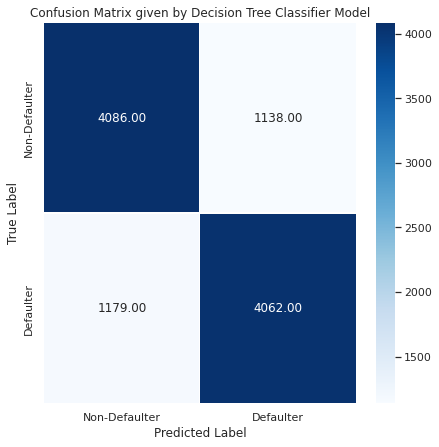

In [669]:
#Lets draw the Confusion matrix given by the Decision Tree Classifier Model.
cm = confusion_matrix(y_test,dtc_pred)
x_axis_labels=['Non-Defaulter','Defaulter']
y_axis_labels=['Non-Defaulter','Defaulter']
ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix given by {model}')
plt.show()

In [670]:
#Checking for the ROC_AUC Score of Decision Tree Classifier  model
print(f"***********************ROC_AUC_SCORE given by {model}************************************")
roc_auc_score(y_test,dtc.predict(x_test))
print(f"ROC_AUC_SCORE given by {model} is: ",roc_auc_score(y_test,dtc.predict(x_test)))

***********************ROC_AUC_SCORE given by Decision Tree Classifier Model************************************
ROC_AUC_SCORE given by Decision Tree Classifier Model is:  0.7786010978347481


**Random Forest Classifier Model**

In [671]:
#Training Result of Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
model="Random Forest Classifier Model"
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_train)
rfc_clf_report = pd.DataFrame(classification_report(y_train,rfc_pred,output_dict=True))
print(f"\n************************Training Result of {model}*********************************")
print(f"Accuracy score given by the {model} is :{accuracy_score(y_train,rfc_pred)*100:.2f}%")
print("*******************************************************************************************************")
print(f"Classification report given by {model}:\n{rfc_clf_report}")
print("*******************************************************************************************************")
print(f" Confusion Matrix given by {model} :\n{confusion_matrix(y_train,rfc_pred)}\n")


************************Training Result of Random Forest Classifier Model*********************************
Accuracy score given by the Random Forest Classifier Model is :100.00%
*******************************************************************************************************
Classification report given by Random Forest Classifier Model:
                      0             1  accuracy     macro avg  weighted avg
precision      0.999904      1.000000  0.999952      0.999952      0.999952
recall         1.000000      0.999904  0.999952      0.999952      0.999952
f1-score       0.999952      0.999952  0.999952      0.999952      0.999952
support    20938.000000  20921.000000  0.999952  41859.000000  41859.000000
*******************************************************************************************************
 Confusion Matrix given by Random Forest Classifier Model :
[[20938     0]
 [    2 20919]]



In [672]:
#Test Result of Random Forest Classifier Model
rfc_pred=gnb.predict(x_test)
rfc_clf_report = pd.DataFrame(classification_report(y_test,rfc_pred,output_dict=True))
print(f"\n********************************Test Result of {model}*****************************************")
print(f"Accuracy score given by the  {model} is:{accuracy_score(y_test,rfc_pred)*100:.2f}%")
print("*******************************************************************************************************************")
print(f"Classification report given by {model}:\n{rfc_clf_report}")
print("*******************************************************************************************************************")
print(f" Confusion Matrix given by {model}:\n{confusion_matrix(y_test,rfc_pred)}\n")


********************************Test Result of Random Forest Classifier Model*****************************************
Accuracy score given by the  Random Forest Classifier Model is:69.78%
*******************************************************************************************************************
Classification report given by Random Forest Classifier Model:
                     0            1  accuracy     macro avg  weighted avg
precision     0.637162     0.851965  0.697754      0.744564      0.744738
recall        0.916348     0.479870  0.697754      0.698109      0.697754
f1-score      0.751668     0.613939  0.697754      0.682804      0.682692
support    5224.000000  5241.000000  0.697754  10465.000000  10465.000000
*******************************************************************************************************************
 Confusion Matrix given by Random Forest Classifier Model:
[[4787  437]
 [2726 2515]]



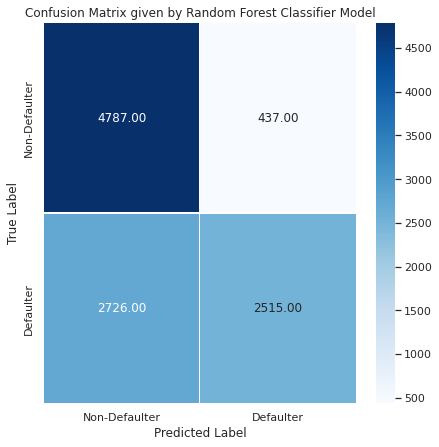

In [673]:
#Lets draw the Confusion matrix given by the Random Forest Classifier Model.
cm = confusion_matrix(y_test,rfc_pred)
x_axis_labels=['Non-Defaulter','Defaulter']
y_axis_labels=['Non-Defaulter','Defaulter']
ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix given by {model}')
plt.show()

In [674]:
#Checking for the ROC_AUC Score of Random Forest Classifier  Model
print(f"***********************ROC_AUC_SCORE given by {model}************************************")
roc_auc_score(y_test,rfc.predict(x_test))
print(f"ROC_AUC_SCORE given by {model} is: ",roc_auc_score(y_test,rfc.predict(x_test)))

***********************ROC_AUC_SCORE given by Random Forest Classifier Model************************************
ROC_AUC_SCORE given by Random Forest Classifier Model is:  0.839074470404015


**Gradient Boosting Classifier**

In [675]:
#Training Result of Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model="Gradient Boosting Classifier"
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc_pred = gbc.predict(x_train)
gbc_clf_report = pd.DataFrame(classification_report(y_train,gbc_pred,output_dict=True))
print(f"\n************************Training Result of {model}*********************************")
print(f"Accuracy score given by the {model} is :{accuracy_score(y_train,gbc_pred)*100:.2f}%")
print("*******************************************************************************************************")
print(f"Classification report given by {model}:\n{gbc_clf_report}")
print("*******************************************************************************************************")
print(f" Confusion Matrix given by {model} :\n{confusion_matrix(y_train,gbc_pred)}\n")



************************Training Result of Gradient Boosting Classifier*********************************
Accuracy score given by the Gradient Boosting Classifier is :83.85%
*******************************************************************************************************
Classification report given by Gradient Boosting Classifier:
                      0             1  accuracy     macro avg  weighted avg
precision      0.834268      0.842906  0.838529      0.838587      0.838585
recall         0.845066      0.831987  0.838529      0.838527      0.838529
f1-score       0.839633      0.837411  0.838529      0.838522      0.838522
support    20938.000000  20921.000000  0.838529  41859.000000  41859.000000
*******************************************************************************************************
 Confusion Matrix given by Gradient Boosting Classifier :
[[17694  3244]
 [ 3515 17406]]



In [676]:
#Test Result of Gradient Boosting Classifier
gbc_pred=gbc.predict(x_test)
gbc_clf_report = pd.DataFrame(classification_report(y_test,gbc_pred,output_dict=True))
print(f"\n********************************Test Result of {model}*****************************************")
print(f"Accuracy score given by the  {model} is:{accuracy_score(y_test,gbc_pred)*100:.2f}%")
print("*******************************************************************************************************************")
print(f"Classification report given by {model}:\n{gbc_clf_report}")
print("*******************************************************************************************************************")
print(f" Confusion Matrix given by {model}:\n{confusion_matrix(y_test,gbc_pred)}\n")


********************************Test Result of Gradient Boosting Classifier*****************************************
Accuracy score given by the  Gradient Boosting Classifier is:83.56%
*******************************************************************************************************************
Classification report given by Gradient Boosting Classifier:
                     0            1  accuracy     macro avg  weighted avg
precision     0.832827     0.838493  0.835643      0.835660      0.835664
recall        0.839204     0.832093  0.835643      0.835648      0.835643
f1-score      0.836003     0.835281  0.835643      0.835642      0.835641
support    5224.000000  5241.000000  0.835643  10465.000000  10465.000000
*******************************************************************************************************************
 Confusion Matrix given by Gradient Boosting Classifier:
[[4384  840]
 [ 880 4361]]



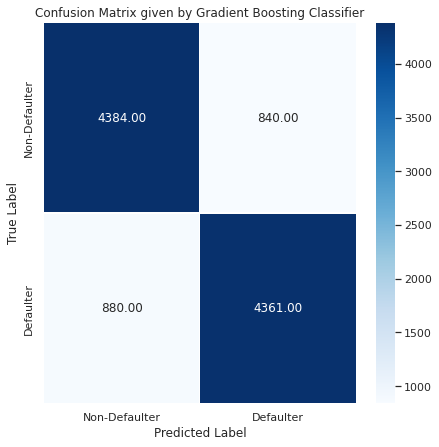

In [677]:
#Lets draw the Confusion matrix given by the Gradient Boosting Classifier Model.
cm = confusion_matrix(y_test,gbc_pred)
x_axis_labels=['Non-Defaulter','Defaulter']
y_axis_labels=['Non-Defaulter','Defaulter']
ax=plt.subplots(figsize=(7,7))
sns.heatmap(cm,annot=True,linewidths=0.1,fmt='.2f',cmap='Blues',xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title(f'Confusion Matrix given by {model}')
plt.show()

In [678]:
#Checking for the ROC_AUC Score of Gradient Boosting Classifier  Model
print(f"***********************ROC_AUC_SCORE given by {model}************************************")
roc_auc_score(y_test,gbc.predict(x_test))
print(f"ROC_AUC_SCORE given by {model} is: ",roc_auc_score(y_test,gbc.predict(x_test)))

***********************ROC_AUC_SCORE given by Gradient Boosting Classifier************************************
ROC_AUC_SCORE given by Gradient Boosting Classifier is:  0.835648393673045


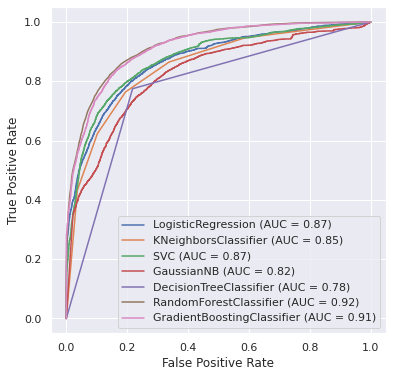

In [679]:
# ROC_AUC curve for above models:
disp = plot_roc_curve(lr,x_test,y_test)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svm,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gnb,x_test,y_test,ax=disp.ax_)
plot_roc_curve(dtc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rfc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(gbc,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.show()

In [680]:
#Lets do the cross validation to check the overfitting of the models.
from sklearn.model_selection import cross_val_score

scr=cross_val_score(lr,x,y,cv=5)
print("Cross validation score of Logistic Regression model :",scr.mean())

scr=cross_val_score(kn,x,y,cv=5)
print("Cross validation score of KNN Classifier model :",scr.mean())


scr=cross_val_score(svm,x,y,cv=5)
print("Cross validation score of Support vector classifier model :",scr.mean())

scr=cross_val_score(gnb,x,y,cv=5)
print("Cross validation score of Naive Bayes classifier model :",scr.mean())

scr=cross_val_score(dtc,x,y,cv=5)
print("Cross validation score of Decision Tree Classifier  model :",scr.mean())

scr=cross_val_score(rfc,x,y,cv=5)
print("Cross validation score of Randomforest Classifier  model :",scr.mean())

scr=cross_val_score(gbc,x,y,cv=5)
print("Cross validation score of Gradient Boosting Classifier  model :",scr.mean())

Cross validation score of Logistic Regression model : 0.732761220962258
Cross validation score of KNN Classifier model : 0.7439415442621466
Cross validation score of Support vector classifier model : 0.7325701113804424
Cross validation score of Naive Bayes classifier model : 0.6865681841758826
Cross validation score of Decision Tree Classifier  model : 0.7754567485765133
Cross validation score of Randomforest Classifier  model : 0.8374550452871155
Cross validation score of Gradient Boosting Classifier  model : 0.8336900999545594


**Our Gradient Boosting model is performing best,let us do the hyperparameter tuning of this model.**

In [681]:
#Importing grid search CV.
from sklearn.model_selection import GridSearchCV
parameters={"criterion":['squared_error','mse'],"max_features":['auto','sqrt']}
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)
GCV.best_params_
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)
print(f"Accuracy score given by the Tuned Gradient Boosting Classifier model is :{accuracy_score(y_test,GCV_pred)}")

Accuracy score given by the Tuned Gradient Boosting Classifier model is :0.8356426182513139


**We can clearly see that upon hyperparameter tuning ,our model performance raised from 0.8336 to 0.8359,that is increment of 0.23%.**

In [682]:
#Dumping our model
import joblib   
joblib.dump(GCV.best_estimator_,"gbmicrofinance.pkl")

['gbmicrofinance.pkl']